# Impporting the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.cluster import KMeans,DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [2]:
### loading the dataset
df = pd.read_excel('LFB_DATA.xlsx')
df = df[df['IncGeo_BoroughName'] == 'BEXLEY']
df = df.reset_index()
df.head()

,index,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,16,000104-01012019,01 Jan 2019,2019,00:22:43,0,Fire,Secondary Fire,NaN,Outdoor,...,225.0,Erith,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
1,82,000263-01012019,01 Jan 2019,2019,02:01:39,2,Fire,Secondary Fire,NaN,Outdoor,...,450.0,Erith,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
2,118,000349-01012019,01 Jan 2019,2019,06:12:39,6,Fire,Primary Fire,NaN,Road Vehicle,...,351.0,Erith,NaN,NaN,1.0,1.0,1.0,1.0,333.0,10.0
3,127,000372-01012019,01 Jan 2019,2019,07:00:09,7,False Alarm,AFA,NaN,Dwelling,...,278.0,Erith,347.0,Bexley,2.0,2.0,2.0,1.0,333.0,2.0
4,133,000383-01012019,01 Jan 2019,2019,08:09:13,8,Special Service,Special Service,Flooding,Dwelling,...,205.0,Sidcup,NaN,NaN,1.0,1.0,1.0,2.0,666.0,1.0


# Data Analysis and Preprocessing

In [3]:
print("The dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset contains 9073 rows and 40 columns


In [4]:
# check some basic stats of dataset
df.describe()

,index,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,9073.000000,9073.000000,9073.000000,9.073000e+03,9.073000e+03,5148.000000,5148.000000,9073.000000,9073.000000,5148.000000,5148.000000,8639.000000,2993.000000,8982.000000,8982.000000,9009.000000,9009.000000,9009.000000,9073.000000
mean,213482.935743,2020.544473,13.689739,3.943265e+10,2.010156e+07,549070.647630,175837.766123,548982.271575,176036.597597,51.321931,0.144122,340.709110,436.620114,1.317413,1.428078,1.516151,1.521701,531.467976,1.463243
std,124439.697332,1.135463,6.112172,4.996273e+10,1.801124e+05,2116.725161,2567.669643,2108.561296,2587.280869,2.680384,0.031780,148.866758,162.003789,0.574875,0.689450,2.258640,9.295093,3265.704952,1.870003
min,16.000000,2019.000000,0.000000,0.000000e+00,1.050013e+07,544403.000000,169798.000000,544450.000000,169750.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1.000000
25%,105856.000000,2020.000000,10.000000,0.000000e+00,2.010049e+07,547402.250000,174328.500000,547350.000000,174450.000000,51.448197,0.120839,241.000000,340.000000,1.000000,1.000000,1.000000,1.000000,339.000000,1.000000
50%,213867.000000,2021.000000,14.000000,1.001185e+10,2.010091e+07,549175.000000,175796.500000,548950.000000,176150.000000,51.461684,0.145782,326.000000,415.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,322994.000000,2022.000000,19.000000,1.000202e+11,2.010141e+07,550758.250000,177880.250000,550850.000000,178050.000000,51.479579,0.169129,413.000000,508.000000,2.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,426459.000000,2022.000000,23.000000,2.000028e+11,3.430069e+07,553989.000000,181452.000000,553950.000000,181450.000000,51.512580,0.216203,1197.000000,1198.000000,7.000000,8.000000,156.000000,664.000000,233728.000000,43.000000


In [5]:
df.median()

index                                2.138670e+05
CalYear                              2.021000e+03
HourOfCall                           1.400000e+01
UPRN                                 1.001185e+10
USRN                                 2.010091e+07
Easting_m                            5.491750e+05
Northing_m                           1.757965e+05
Easting_rounded                      5.489500e+05
Northing_rounded                     1.761500e+05
Latitude                             5.146168e+01
Longitude                            1.457816e-01
FirstPumpArriving_AttendanceTime     3.260000e+02
SecondPumpArriving_AttendanceTime    4.150000e+02
NumStationsWithPumpsAttending        1.000000e+00
NumPumpsAttending                    1.000000e+00
PumpCount                            1.000000e+00
PumpHoursRoundUp                     1.000000e+00
Notional Cost (£)                    3.520000e+02
NumCalls                             1.000000e+00
dtype: float64

In [6]:
# check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   9073 non-null   int64  
 1   IncidentNumber                          9073 non-null   object 
 2   DateOfCall                              9073 non-null   object 
 3   CalYear                                 9073 non-null   int64  
 4   TimeOfCall                              9073 non-null   object 
 5   HourOfCall                              9073 non-null   int64  
 6   IncidentGroup                           9073 non-null   object 
 7   StopCodeDescription                     9073 non-null   object 
 8   SpecialServiceType                      2898 non-null   object 
 9   PropertyCategory                        9073 non-null   object 
 10  PropertyType                            9073 non-null   obje

In [7]:
# check for missing values
df.isna().mean() *100

index                                      0.000000
IncidentNumber                             0.000000
DateOfCall                                 0.000000
CalYear                                    0.000000
TimeOfCall                                 0.000000
HourOfCall                                 0.000000
IncidentGroup                              0.000000
StopCodeDescription                        0.000000
SpecialServiceType                        68.059076
PropertyCategory                           0.000000
PropertyType                               0.000000
AddressQualifier                           0.000000
Postcode_full                             43.260223
Postcode_district                          0.000000
UPRN                                       0.000000
USRN                                       0.000000
IncGeo_BoroughCode                         0.000000
IncGeo_BoroughName                         0.000000
ProperCase                                 0.000000
IncGeo_WardC

In [8]:
### dropping the columns having missing value >50% or clumns that we arre not going to use in our analysis
df = df.drop(['ProperCase','CalYear','IncGeo_BoroughCode','IncGeo_BoroughName','IncidentNumber','TimeOfCall','HourOfCall','FRS','SpecialServiceType','Postcode_full','Easting_m','Northing_m', 'Latitude','Longitude','SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation'],axis=1)
df

,index,DateOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,UPRN,USRN,...,Northing_rounded,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,16,01 Jan 2019,Fire,Secondary Fire,Outdoor,Loose refuse,On land associated with building,DA17,100020187812,20100028,...,178050,Erith,225.0,Erith,1.0,1.0,1.0,1.0,333.0,1.0
1,82,01 Jan 2019,Fire,Secondary Fire,Outdoor,Loose refuse,On land associated with building,DA17,100023627503,20100344,...,178850,Erith,450.0,Erith,1.0,1.0,1.0,1.0,333.0,1.0
2,118,01 Jan 2019,Fire,Primary Fire,Road Vehicle,Car,In street outside gazetteer location,DA8,10023304234,20100198,...,176650,Erith,351.0,Erith,1.0,1.0,1.0,1.0,333.0,10.0
3,127,01 Jan 2019,False Alarm,AFA,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,DA8,0,20100351,...,177550,Erith,278.0,Erith,2.0,2.0,2.0,1.0,333.0,2.0
4,133,01 Jan 2019,Special Service,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,DA15,0,20100873,...,172550,Sidcup,205.0,Sidcup,1.0,1.0,1.0,2.0,666.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,426367,30 Nov 2022,False Alarm,AFA,Other Residential,Retirement/Old Persons Home,Correct incident location,DA1,100020221466,20100870,...,174750,Bexley,302.0,Bexley,2.0,2.0,2.0,1.0,364.0,2.0
9069,426379,30 Nov 2022,False Alarm,AFA,Other Residential,Retirement/Old Persons Home,Correct incident location,DA1,100020221466,20100870,...,174750,Bexley,162.0,Bexley,1.0,1.0,1.0,1.0,364.0,1.0
9070,426405,30 Nov 2022,False Alarm,False alarm - Good intent,Non Residential,Community centre/Hall,On land associated with building,DA16,100022920748,20101499,...,176850,Plumstead,439.0,Plumstead,1.0,1.0,1.0,1.0,364.0,1.0
9071,426433,30 Nov 2022,Special Service,Special Service,Road Vehicle,Car,In street outside gazetteer location,DA1,100020220459,20100633,...,175050,Bexley,306.0,Bexley,2.0,2.0,2.0,2.0,728.0,1.0


In [9]:
### check for missing values again
df.isna().mean() *100

index                                    0.000000
DateOfCall                               0.000000
IncidentGroup                            0.000000
StopCodeDescription                      0.000000
PropertyCategory                         0.000000
PropertyType                             0.000000
AddressQualifier                         0.000000
Postcode_district                        0.000000
UPRN                                     0.000000
USRN                                     0.000000
IncGeo_WardCode                          0.011022
IncGeo_WardName                          0.011022
IncGeo_WardNameNew                       0.011022
Easting_rounded                          0.000000
Northing_rounded                         0.000000
IncidentStationGround                    0.000000
FirstPumpArriving_AttendanceTime         4.783423
FirstPumpArriving_DeployedFromStation    4.783423
NumStationsWithPumpsAttending            1.002976
NumPumpsAttending                        1.002976


In [10]:
# changing the featture type to date time
df['DateOfCall']= pd.to_datetime(df['DateOfCall'])

In [11]:
# check for minimum and maximum
print(df['DateOfCall'].min())
print(df['DateOfCall'].max())

2019-01-01 00:00:00
2022-11-30 00:00:00


In [12]:
df = df.drop('DateOfCall',axis=1)

# Observations:

*The dataset has data from jan 1 2019 to nov 20 2022

In [13]:
#### Sperating the categoric and numeric features
# seperating the categorical featues from numeric features
numeric_cols = df.select_dtypes(['float64','int64']).columns
categoric_cols = df.select_dtypes('object').columns

df_numeric = df[numeric_cols]
df_categoric = df[categoric_cols]

In [19]:
# imputing the missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_numeric)

In [20]:
df_numeric = pd.DataFrame(imputer.transform(df_numeric),columns=df_numeric.columns)

In [22]:
df_categoric = df_categoric.fillna('NA')

# UNI-VARIATE ANALYSIS

In [23]:
# 
def labeled_barplot(data, feature, perc=False, n=15):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    print(data[feature].value_counts())
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

False Alarm        4034
Special Service    2898
Fire               2141
Name: IncidentGroup, dtype: int64


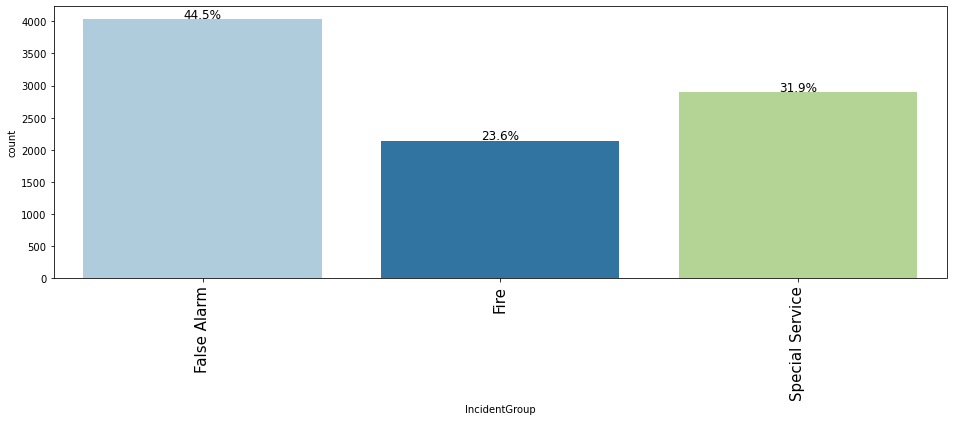

Special Service                          2879
AFA                                      2839
Secondary Fire                           1256
False alarm - Good intent                1121
Primary Fire                              883
False alarm - Malicious                    74
Flood call attended - Batch mobilised      19
Chimney Fire                                2
Name: StopCodeDescription, dtype: int64


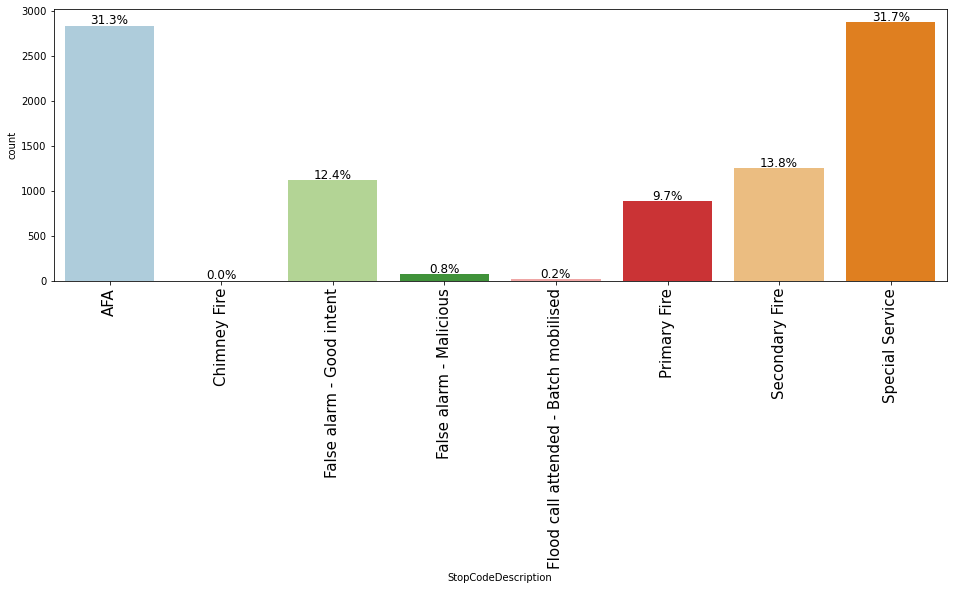

Dwelling             3851
Non Residential      1648
Outdoor              1423
Road Vehicle          969
Other Residential     611
Outdoor Structure     567
Rail Vehicle            3
Boat                    1
Name: PropertyCategory, dtype: int64


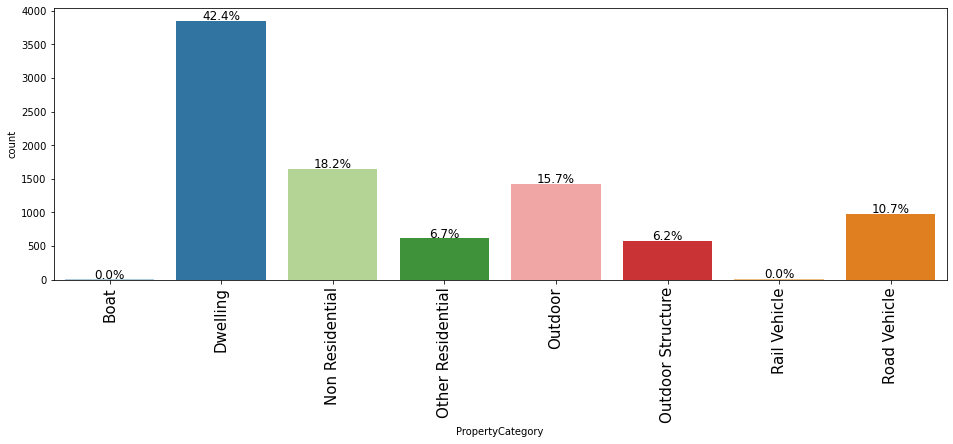

House - single occupancy                              1452
Purpose Built Flats/Maisonettes - Up to 3 storeys      777
Car                                                    565
Self contained Sheltered Housing                       556
Purpose Built Flats/Maisonettes - 4 to 9 storeys       534
                                                      ... 
Cricket ground                                           1
Nurseries/ market garden                                 1
Exhibition Centre                                        1
Other bulk storage                                       1
Health Centre                                            1
Name: PropertyType, Length: 203, dtype: int64


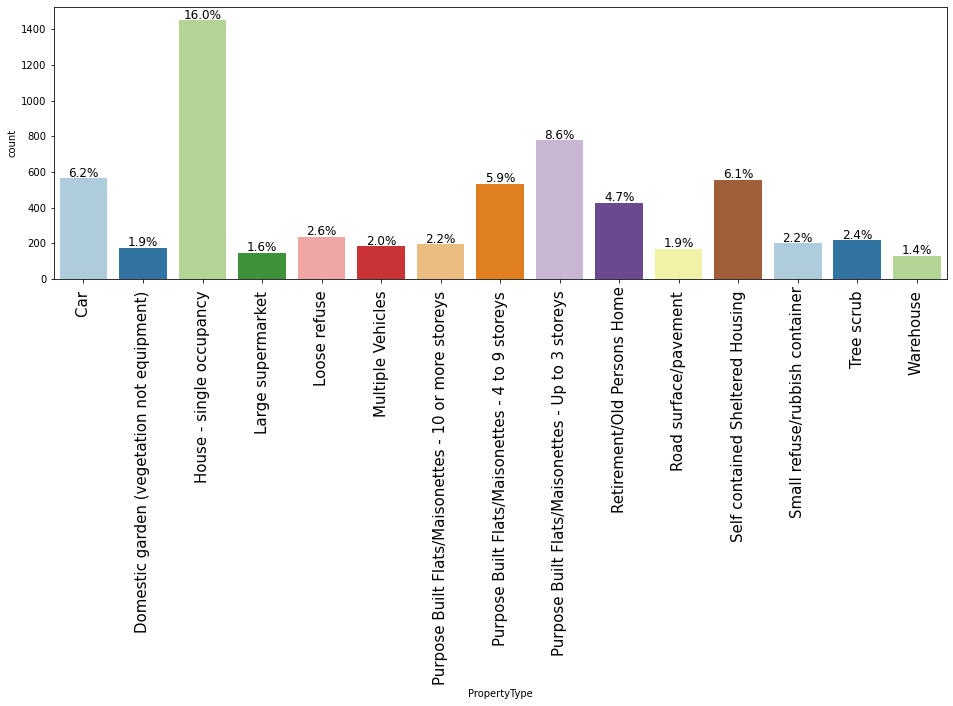

Correct incident location                          4716
Within same building                               1381
On land associated with building                    991
In street outside gazetteer location                818
Open land/water - nearest gazetteer location        619
In street close to gazetteer location               369
Nearby address - street not listed in gazetteer      51
On motorway / elevated road                          47
In street remote from gazetteer location             36
Nearby address - no building in street               32
Railway land or rolling stock                        13
Name: AddressQualifier, dtype: int64


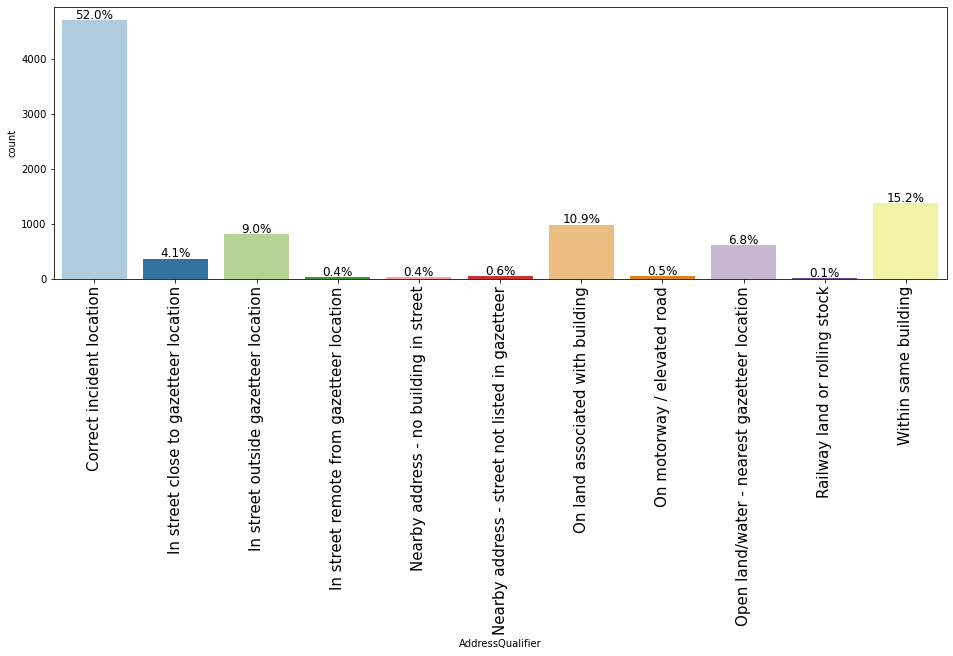

DA8     1979
DA14    1215
DA17     949
DA7      830
DA6      685
DA16     683
DA1      668
DA15     591
DA5      488
SE2      453
DA18     302
SE28     205
SE9       24
BR8        1
Name: Postcode_district, dtype: int64


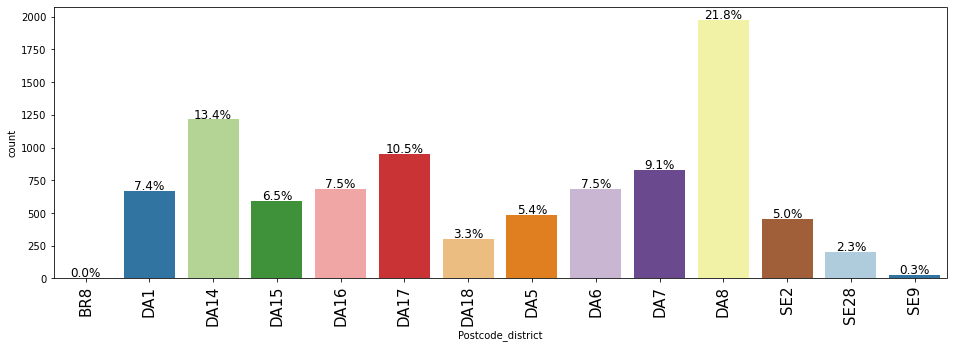

E05011225    986
E05011218    890
E05011230    862
E05011232    852
E05011222    784
E05011231    772
E05011219    764
E05011229    432
E05011226    375
E05011227    348
E05011223    348
E05011217    332
E05011224    296
E05011220    296
E05011221    255
E05011233    252
E05011228    227
E05014088      1
Name: IncGeo_WardCode, dtype: int64


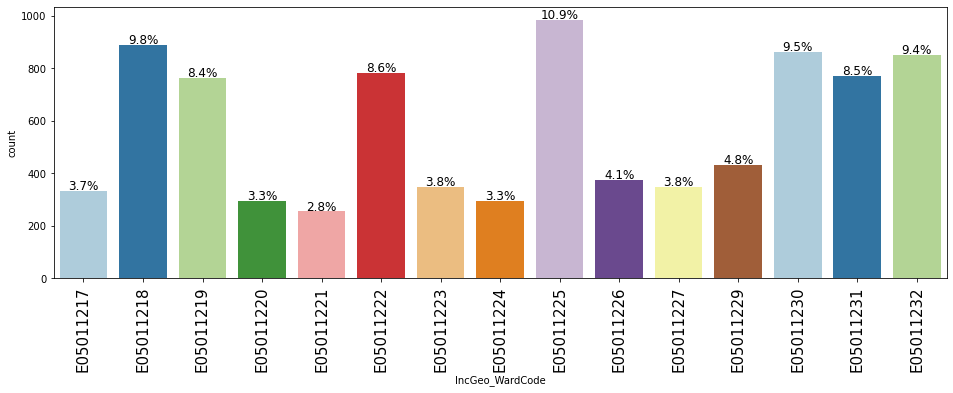

ERITH                     986
BELVEDERE                 889
SIDCUP                    857
THAMESMEAD EAST           852
CRAYFORD                  784
SLADE GREEN & NORTHEND    772
BEXLEYHEATH               764
ST. MARY'S & ST. JAMES    431
FALCONWOOD & WELLING      374
CROOK LOG                 348
LONGLANDS                 345
BARNEHURST                332
BLACKFEN & LAMORBEY       296
EAST WICKHAM              295
BLENDON & PENHILL         255
WEST HEATH                243
NORTHUMBERLAND HEATH      227
West Heath                  9
Sidcup                      5
Longlands                   3
Belvedere                   1
Plumstead Common            1
St. Mary's & St. James      1
East Wickham                1
Falconwood & Welling        1
Name: IncGeo_WardName, dtype: int64


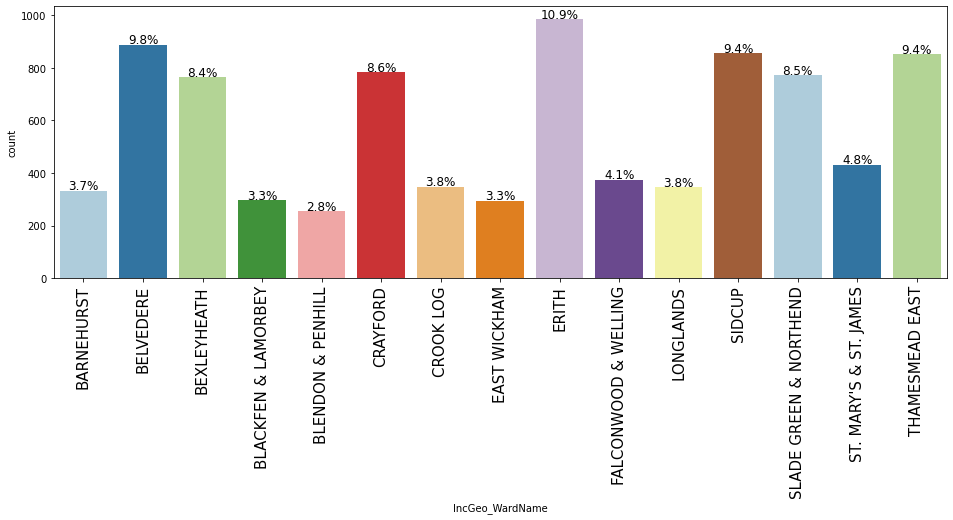

ERITH                     986
BELVEDERE                 889
SIDCUP                    857
THAMESMEAD EAST           852
CRAYFORD                  784
SLADE GREEN & NORTHEND    772
BEXLEYHEATH               764
ST. MARY'S & ST. JAMES    431
FALCONWOOD & WELLING      374
CROOK LOG                 348
LONGLANDS                 345
BARNEHURST                332
BLACKFEN & LAMORBEY       296
EAST WICKHAM              295
BLENDON & PENHILL         255
WEST HEATH                243
NORTHUMBERLAND HEATH      227
West Heath                  9
Sidcup                      5
Longlands                   3
Belvedere                   1
Plumstead Common            1
St. Mary's & St. James      1
East Wickham                1
Falconwood & Welling        1
Name: IncGeo_WardNameNew, dtype: int64


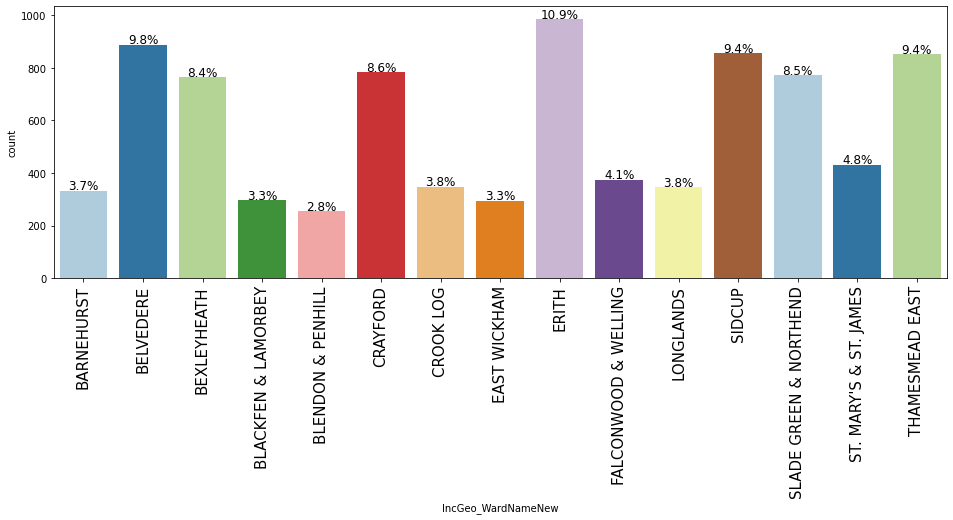

Erith        3507
Bexley       3016
Sidcup       1651
Plumstead     607
Eltham        292
Name: IncidentStationGround, dtype: int64


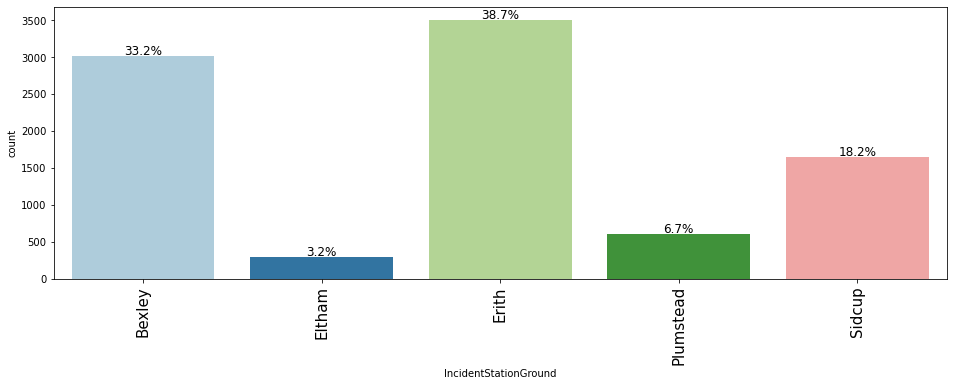

Bexley            2735
Erith             2589
Sidcup            1627
Plumstead         1264
Eltham             348
East Greenwich      28
Orpington           24
Lee Green            7
Deptford             3
Bromley              3
Greenwich            2
Beckenham            1
Addington            1
Lewisham             1
Dowgate              1
Holloway             1
Dartford             1
Richmond             1
Chingford            1
Sutton               1
Name: FirstPumpArriving_DeployedFromStation, dtype: int64


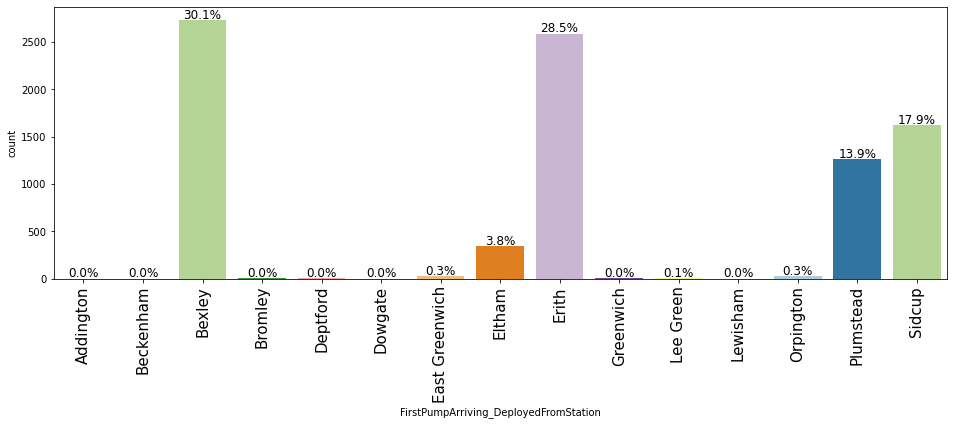

In [24]:
# Analyzing the categoric features
for i in df_categoric.columns:
    labeled_barplot(df, i, perc=True)

Index(['index', 'UPRN', 'USRN', 'Easting_rounded', 'Northing_rounded',
       'FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending',
       'NumPumpsAttending', 'PumpCount', 'PumpHoursRoundUp',
       'Notional Cost (£)', 'NumCalls'],
      dtype='object')


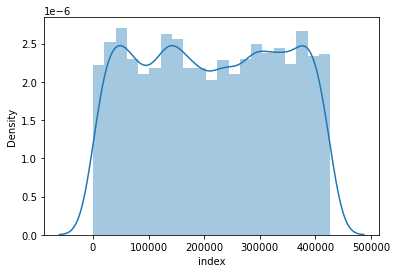

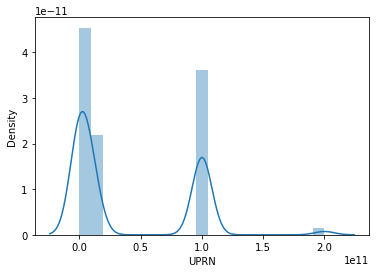

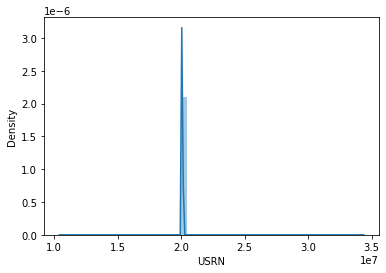

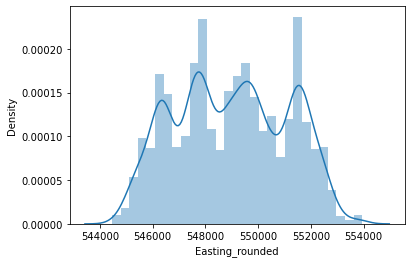

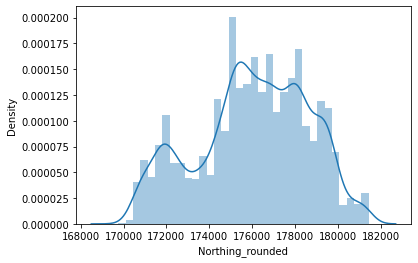

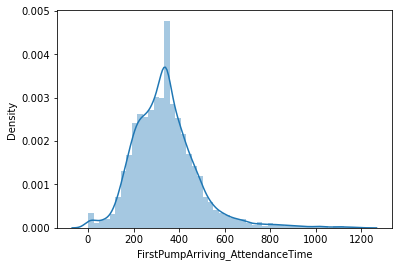

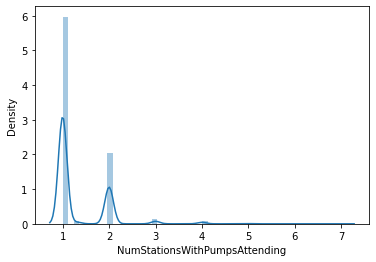

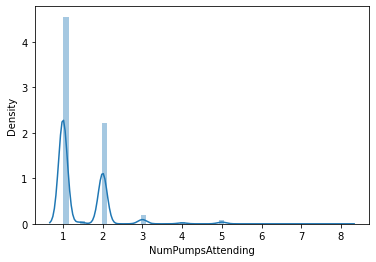

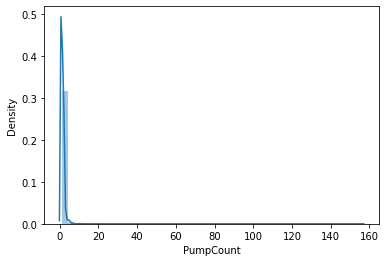

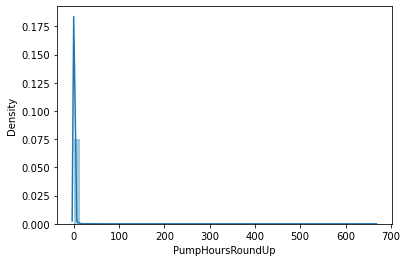

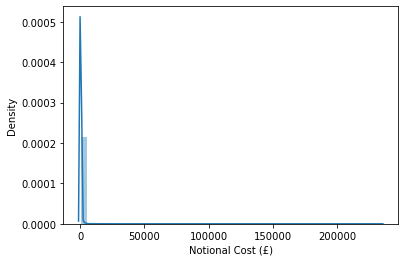

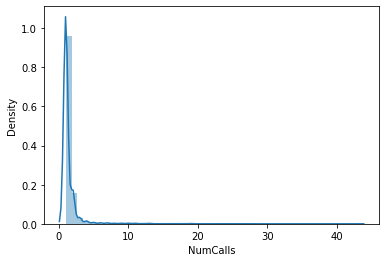

In [25]:
# Analyzing the numeric features
print(df_numeric.columns)
for i in df_numeric.columns:
    plt.figure()
    sns.distplot(df_numeric[i])
    plt.show()

# Observations:

*We are going to predict the category of incident.

# Bivariate Analysis

In [26]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

IncidentGroup                          False Alarm  Fire  Special Service  \
StopCodeDescription                                                         
All                                           4034  2141             2898   
Secondary Fire                                   0  1256                0   
Primary Fire                                     0   883                0   
Chimney Fire                                     0     2                0   
AFA                                           2839     0                0   
False alarm - Good intent                     1121     0                0   
False alarm - Malicious                         74     0                0   
Flood call attended - Batch mobilised            0     0               19   
Special Service                                  0     0             2879   

IncidentGroup                           All  
StopCodeDescription                          
All                                    9073  
Secondary Fire

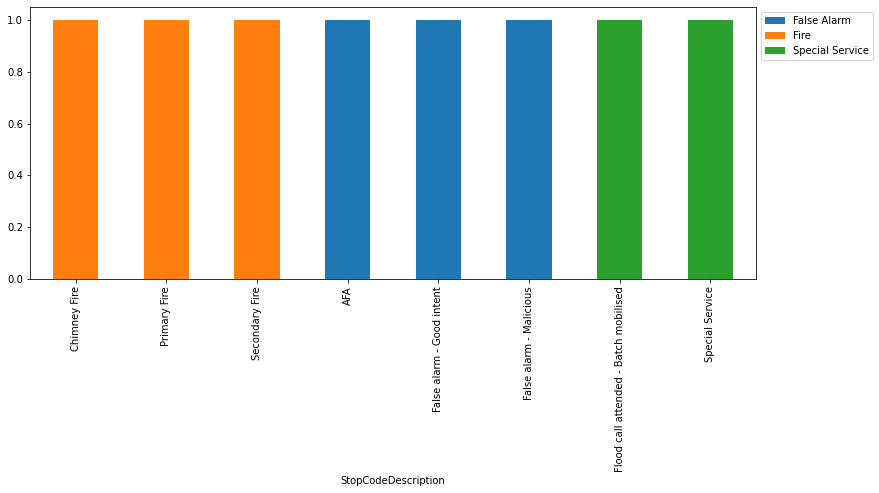

IncidentGroup      False Alarm  Fire  Special Service   All
PropertyCategory                                           
All                       4034  2141             2898  9073
Outdoor                    319   858              246  1423
Outdoor Structure           61   462               44   567
Dwelling                  1772   395             1684  3851
Road Vehicle               107   269              593   969
Non Residential           1301   138              209  1648
Other Residential          474    18              119   611
Boat                         0     1                0     1
Rail Vehicle                 0     0                3     3
------------------------------------------------------------------------------------------------------------------------


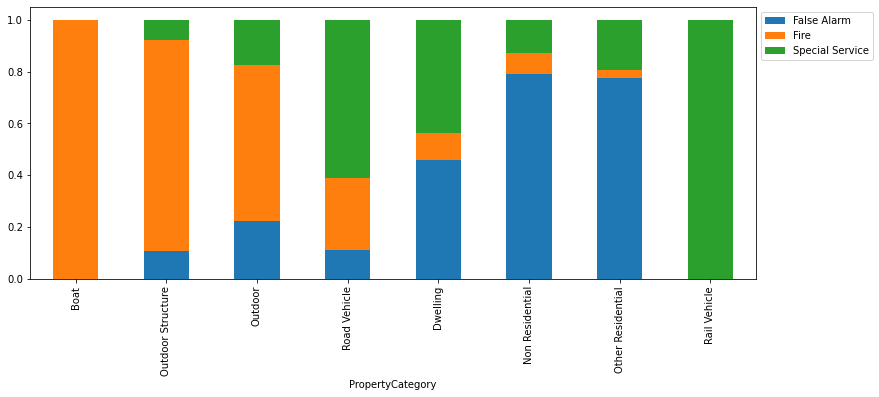

IncidentGroup                           False Alarm  Fire  Special Service  \
PropertyType                                                                 
All                                            4034  2141             2898   
Loose refuse                                     30   206                0   
House - single occupancy                        574   191              687   
Small refuse/rubbish container                   20   180                0   
Tree scrub                                       32   177                9   
...                                             ...   ...              ...   
Other office/call centre type building            2     0                0   
Other indoor sporting venue                       4     0                1   
Other entertainment venue                        14     0                0   
Other education establishment                     5     0                3   
Other bulk storage                                1     0       

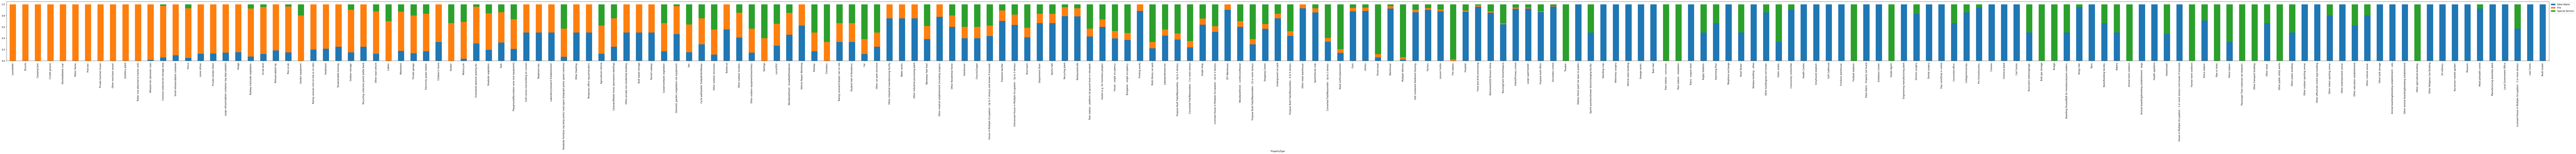

IncidentGroup                                    False Alarm  Fire  \
AddressQualifier                                                     
All                                                     4034  2141   
On land associated with building                         236   597   
Correct incident location                               2722   489   
Open land/water - nearest gazetteer location             103   449   
In street outside gazetteer location                      87   294   
In street close to gazetteer location                     52   150   
Within same building                                     796    88   
Nearby address - street not listed in gazetteer           20    22   
Nearby address - no building in street                     4    21   
In street remote from gazetteer location                   6    18   
Railway land or rolling stock                              1     7   
On motorway / elevated road                                7     6   

IncidentGroup      

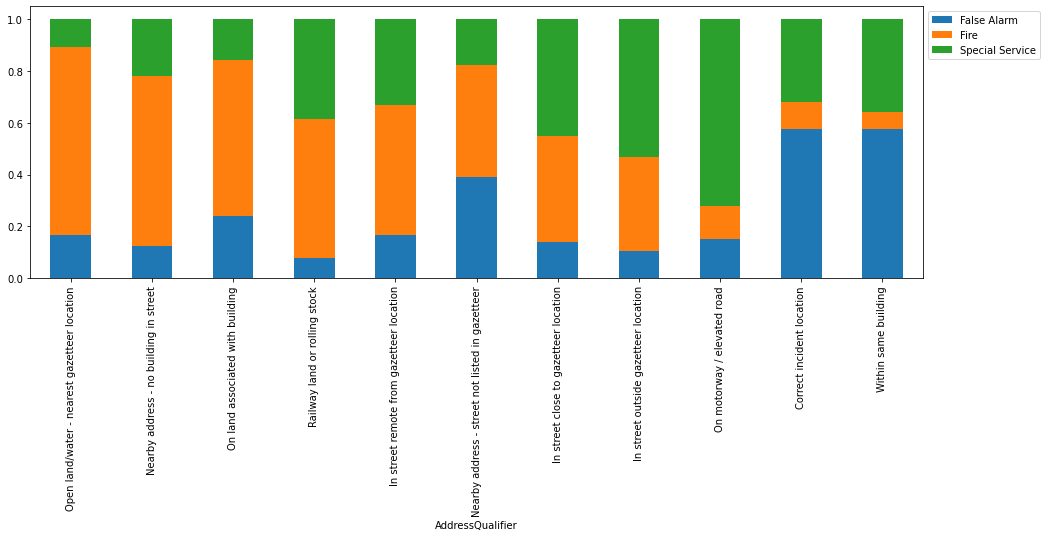

IncidentGroup      False Alarm  Fire  Special Service   All
Postcode_district                                          
All                       4034  2141             2898  9073
DA8                        814   555              610  1979
DA17                       427   237              285   949
DA14                       643   202              370  1215
DA16                       249   175              259   683
DA1                        340   171              157   668
SE2                        157   159              137   453
DA7                        382   152              296   830
DA15                       212   148              231   591
DA6                        377   123              185   685
DA5                        232   106              150   488
DA18                       135    55              112   302
SE28                        57    49               99   205
SE9                          9     9                6    24
BR8                          0     0    

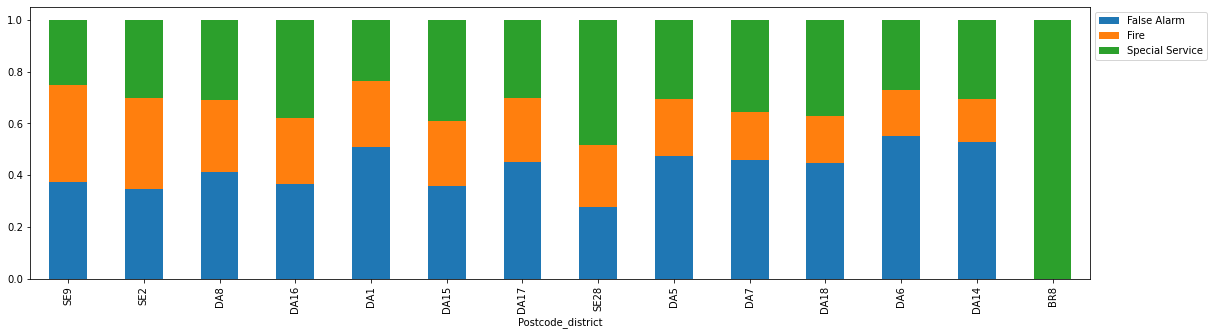

IncidentGroup    False Alarm  Fire  Special Service   All
IncGeo_WardCode                                          
All                     4034  2141             2897  9072
E05011231                259   288              225   772
E05011218                382   248              260   890
E05011232                329   209              314   852
E05011222                401   205              178   784
E05011225                485   202              299   986
E05011219                398   128              238   764
E05011230                501   126              235   862
E05011229                184   111              137   432
E05011220                 98    95              103   296
E05011226                156    94              125   375
E05011224                 91    87              118   296
E05011221                 92    64               99   255
E05011223                165    63              120   348
E05011233                 80    62              110   252
E05011217     

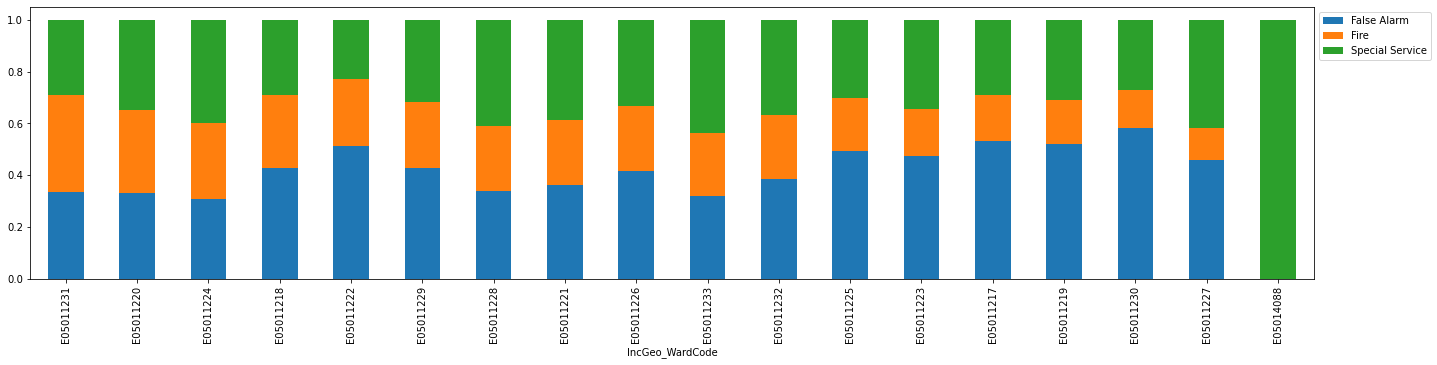

IncidentGroup           False Alarm  Fire  Special Service   All
IncGeo_WardName                                                 
All                            4034  2141             2897  9072
SLADE GREEN & NORTHEND          259   288              225   772
BELVEDERE                       382   248              259   889
THAMESMEAD EAST                 329   209              314   852
CRAYFORD                        401   205              178   784
ERITH                           485   202              299   986
BEXLEYHEATH                     398   128              238   764
SIDCUP                          501   126              230   857
ST. MARY'S & ST. JAMES          184   111              136   431
BLACKFEN & LAMORBEY              98    95              103   296
FALCONWOOD & WELLING            155    94              125   374
EAST WICKHAM                     90    87              118   295
BLENDON & PENHILL                92    64               99   255
CROOK LOG                

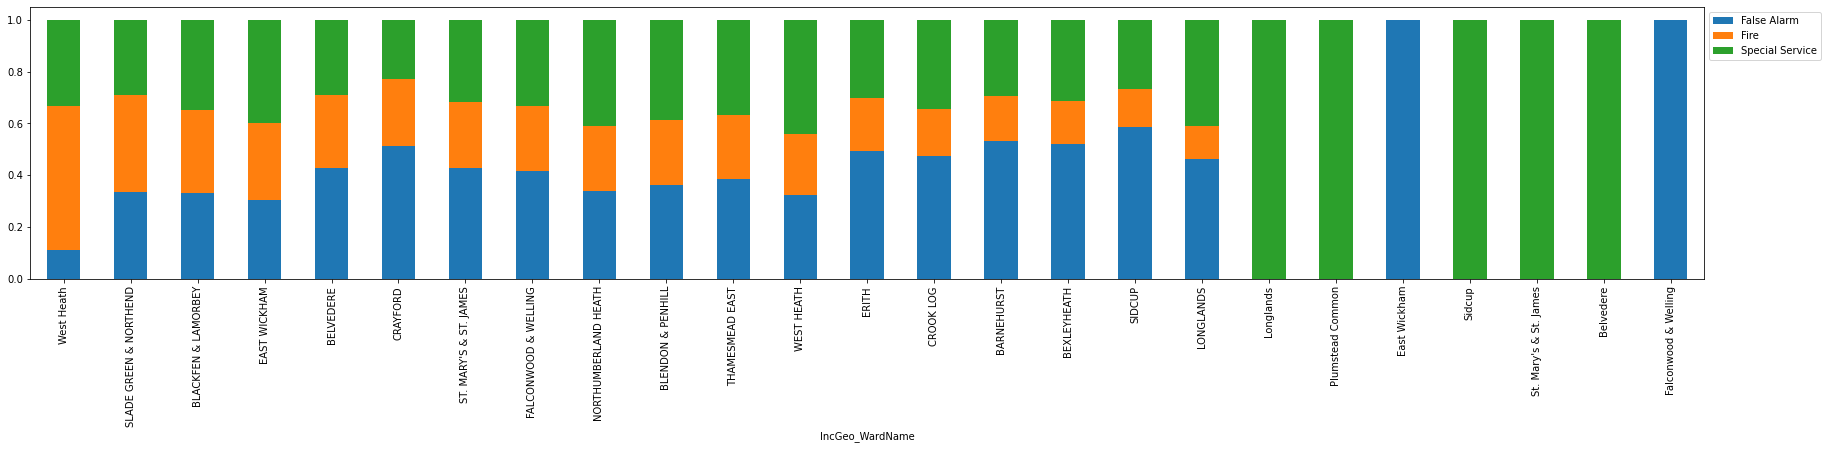

IncidentGroup           False Alarm  Fire  Special Service   All
IncGeo_WardNameNew                                              
All                            4034  2141             2897  9072
SLADE GREEN & NORTHEND          259   288              225   772
BELVEDERE                       382   248              259   889
THAMESMEAD EAST                 329   209              314   852
CRAYFORD                        401   205              178   784
ERITH                           485   202              299   986
BEXLEYHEATH                     398   128              238   764
SIDCUP                          501   126              230   857
ST. MARY'S & ST. JAMES          184   111              136   431
BLACKFEN & LAMORBEY              98    95              103   296
FALCONWOOD & WELLING            155    94              125   374
EAST WICKHAM                     90    87              118   295
BLENDON & PENHILL                92    64               99   255
CROOK LOG                

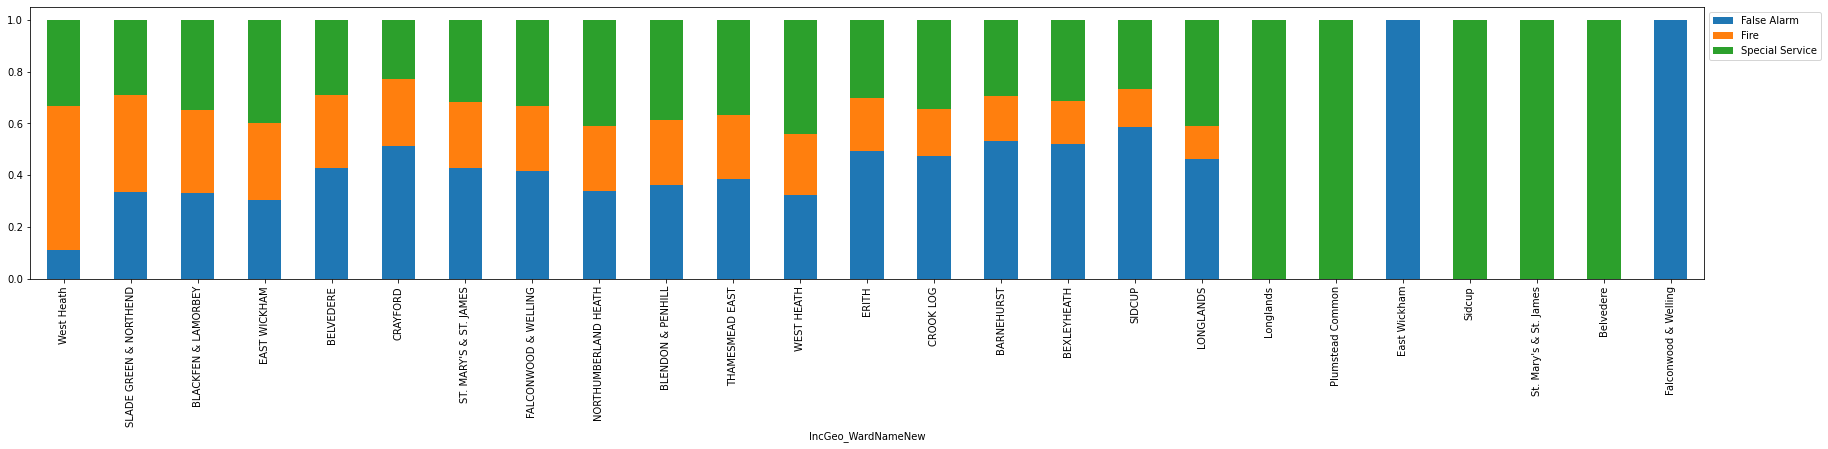

IncidentGroup          False Alarm  Fire  Special Service   All
IncidentStationGround                                          
All                           4034  2141             2898  9073
Erith                         1503   945             1059  3507
Bexley                        1441   643              932  3016
Sidcup                         799   303              549  1651
Plumstead                      208   152              247   607
Eltham                          83    98              111   292
------------------------------------------------------------------------------------------------------------------------


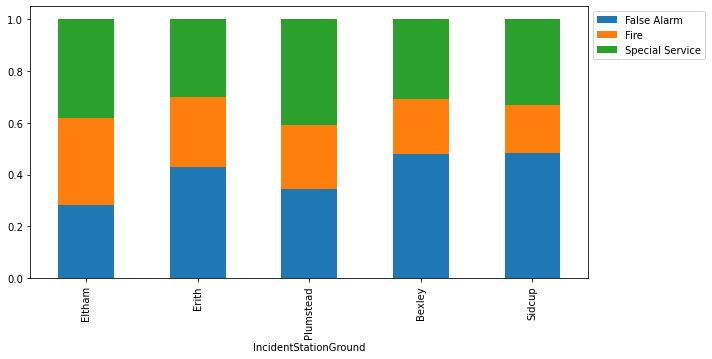

IncidentGroup                          False Alarm  Fire  Special Service  \
FirstPumpArriving_DeployedFromStation                                       
All                                           3976  2105             2558   
Erith                                         1175   706              708   
Bexley                                        1339   610              786   
Plumstead                                      492   351              421   
Sidcup                                         789   321              517   
Eltham                                         138    97              113   
East Greenwich                                  15     9                4   
Orpington                                       14     5                5   
Bromley                                          2     1                0   
Sutton                                           0     1                0   
Greenwich                                        0     1                1   

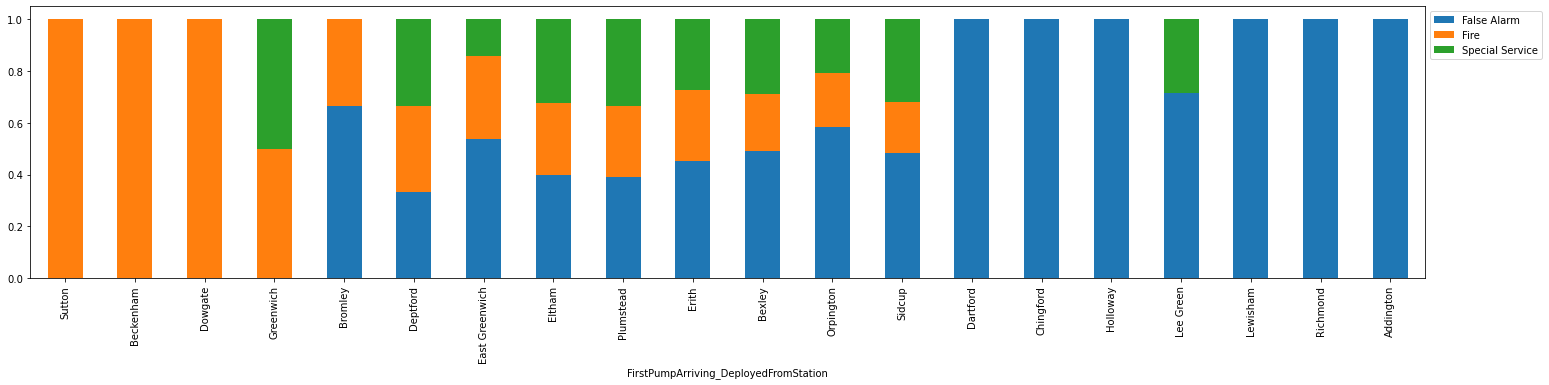

In [27]:
# Analyzing the categoric features
for i in df_categoric.columns[1:]:
    stacked_barplot(df, i, "IncidentGroup")

In [28]:
# concatinating both data frames
df = pd.concat([df_numeric,df_categoric],axis=1)
df = df.drop("index",axis=1)
df

,UPRN,USRN,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),...,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_DeployedFromStation
0,1.000202e+11,20100028.0,548950.0,178050.0,225.0,1.0,1.0,1.0,1.0,333.0,...,Secondary Fire,Outdoor,Loose refuse,On land associated with building,DA17,E05011218,BELVEDERE,BELVEDERE,Erith,Erith
1,1.000236e+11,20100344.0,549150.0,178850.0,450.0,1.0,1.0,1.0,1.0,333.0,...,Secondary Fire,Outdoor,Loose refuse,On land associated with building,DA17,E05011218,BELVEDERE,BELVEDERE,Erith,Erith
2,1.002330e+10,20100198.0,551950.0,176650.0,351.0,1.0,1.0,1.0,1.0,333.0,...,Primary Fire,Road Vehicle,Car,In street outside gazetteer location,DA8,E05011231,SLADE GREEN & NORTHEND,SLADE GREEN & NORTHEND,Erith,Erith
3,0.000000e+00,20100351.0,551650.0,177550.0,278.0,2.0,2.0,2.0,1.0,333.0,...,AFA,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,DA8,E05011225,ERITH,ERITH,Erith,Erith
4,0.000000e+00,20100873.0,546050.0,172550.0,205.0,1.0,1.0,1.0,2.0,666.0,...,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,DA15,E05011227,LONGLANDS,LONGLANDS,Sidcup,Sidcup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,1.000202e+11,20100870.0,550950.0,174750.0,302.0,2.0,2.0,2.0,1.0,364.0,...,AFA,Other Residential,Retirement/Old Persons Home,Correct incident location,DA1,E05011222,CRAYFORD,CRAYFORD,Bexley,Bexley
9069,1.000202e+11,20100870.0,550950.0,174750.0,162.0,1.0,1.0,1.0,1.0,364.0,...,AFA,Other Residential,Retirement/Old Persons Home,Correct incident location,DA1,E05011222,CRAYFORD,CRAYFORD,Bexley,Bexley
9070,1.000229e+11,20101499.0,546850.0,176850.0,439.0,1.0,1.0,1.0,1.0,364.0,...,False alarm - Good intent,Non Residential,Community centre/Hall,On land associated with building,DA16,E05011224,EAST WICKHAM,EAST WICKHAM,Plumstead,Plumstead
9071,1.000202e+11,20100633.0,551650.0,175050.0,306.0,2.0,2.0,2.0,2.0,728.0,...,Special Service,Road Vehicle,Car,In street outside gazetteer location,DA1,E05011222,CRAYFORD,CRAYFORD,Bexley,Bexley


In [29]:
df = df.drop('StopCodeDescription',axis=1)
df_categoric = df_categoric.drop('StopCodeDescription',axis=1)

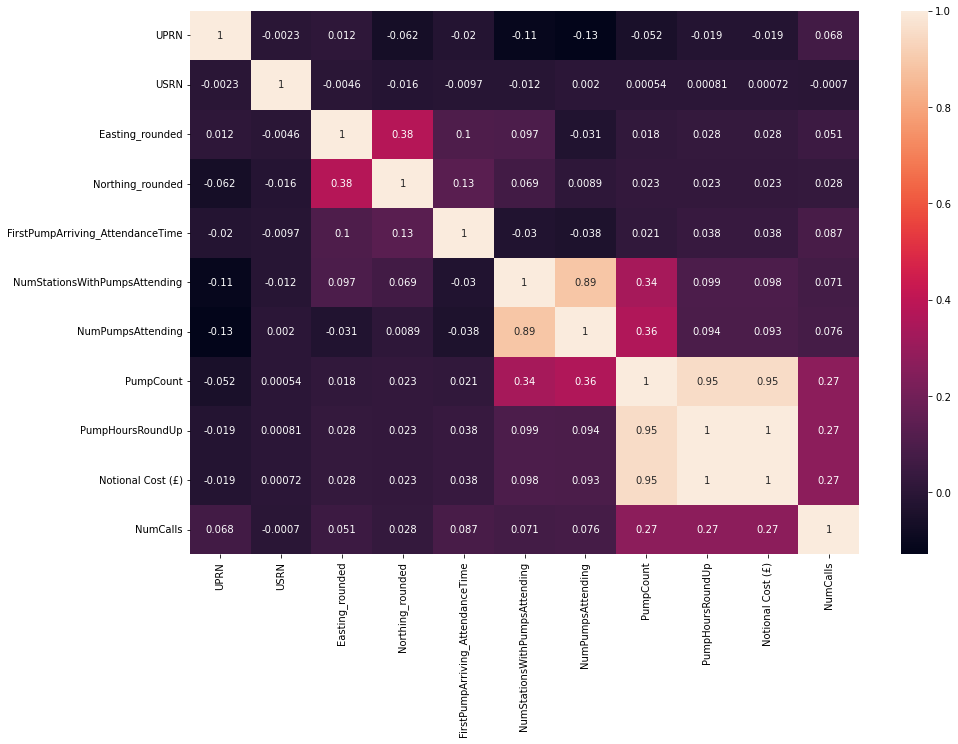

In [30]:
### CHECK CORRELATION
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'),annot = True)
plt.show()

# Observations:

There are features that are higgly coorelated we are going to drop them

In [31]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [32]:
df_copy = df.copy() ### maintain a copy for later use

In [33]:
### Encoding the categoric varibales
le = LabelEncoder()
for i in  df_categoric.columns:
    df[i]= le.fit_transform(df[i])

In [34]:
### seperating the features from class labels 
X = df.drop('IncidentGroup',axis=1)
y = df['IncidentGroup']

In [35]:
### scaling or noarmalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
### train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3
)

# Predictive Machine learning Models

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    
    
    #y_pred = model.predict(predictors)
    cm = confusion_matrix(target, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    disp.plot(xticks_rotation = "vertical")
    plt.show()
    #labels = np.asarray(
    #    [
    #        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
    #        for item in cm.flatten()
    #    ]
    #).reshape(2, 2)

    #plt.figure(figsize=(6, 4))
    #plt.show()
    #sns.heatmap(cm, annot=labels, fmt="")
    #plt.ylabel("True label")
    #plt.xlabel("Predicted label")
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="macro")  # to compute Recall
    precision = precision_score(target, pred,average="macro")  # to compute Precision
    f1 = f1_score(target, pred,average="macro")# to compute F1-score
    print(classification_report(target, pred))

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

# KNN Classifier

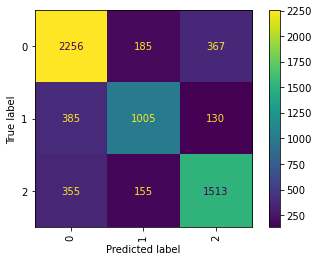

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      2808
           1       0.75      0.66      0.70      1520
           2       0.75      0.75      0.75      2023

    accuracy                           0.75      6351
   macro avg       0.75      0.74      0.74      6351
weighted avg       0.75      0.75      0.75      6351



,Accuracy,Recall,Precision,F1
0,0.751693,0.737501,0.750984,0.743092


In [39]:
### Initialize the model  
model1 = KNeighborsClassifier(n_neighbors=7)

# train the model
model1.fit(X_train,y_train)

# check performance on train data
knn_train_perf = model_performance_classification_sklearn(
    model1, X_train, y_train
)  
knn_train_perf

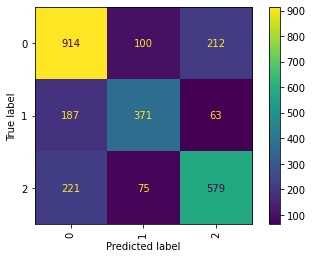

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1226
           1       0.68      0.60      0.64       621
           2       0.68      0.66      0.67       875

    accuracy                           0.68      2722
   macro avg       0.68      0.67      0.67      2722
weighted avg       0.68      0.68      0.68      2722



,Accuracy,Recall,Precision,F1
0,0.684791,0.668217,0.68295,0.674332


In [40]:
# check performance on test data
knn_test_perf = model_performance_classification_sklearn(
    model1, X_test, y_test
)  
knn_test_perf

# Random Forest

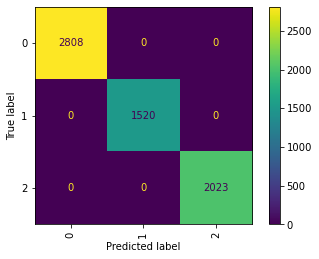

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      1520
           2       1.00      1.00      1.00      2023

    accuracy                           1.00      6351
   macro avg       1.00      1.00      1.00      6351
weighted avg       1.00      1.00      1.00      6351



,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [41]:
### Initialize the model  
model2 = RandomForestClassifier(random_state=42)

# train the model
model2.fit(X_train,y_train)

# check performance on train data
rf_train_perf = model_performance_classification_sklearn(
    model2, X_train, y_train
)  
rf_train_perf

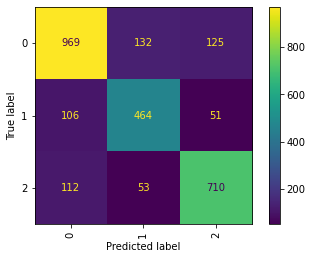

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1226
           1       0.71      0.75      0.73       621
           2       0.80      0.81      0.81       875

    accuracy                           0.79      2722
   macro avg       0.78      0.78      0.78      2722
weighted avg       0.79      0.79      0.79      2722



,Accuracy,Recall,Precision,F1
0,0.787289,0.782995,0.777548,0.780073


In [42]:
# check performance on test data
rf_test_perf = model_performance_classification_sklearn(
    model2, X_test, y_test
)  
rf_test_perf

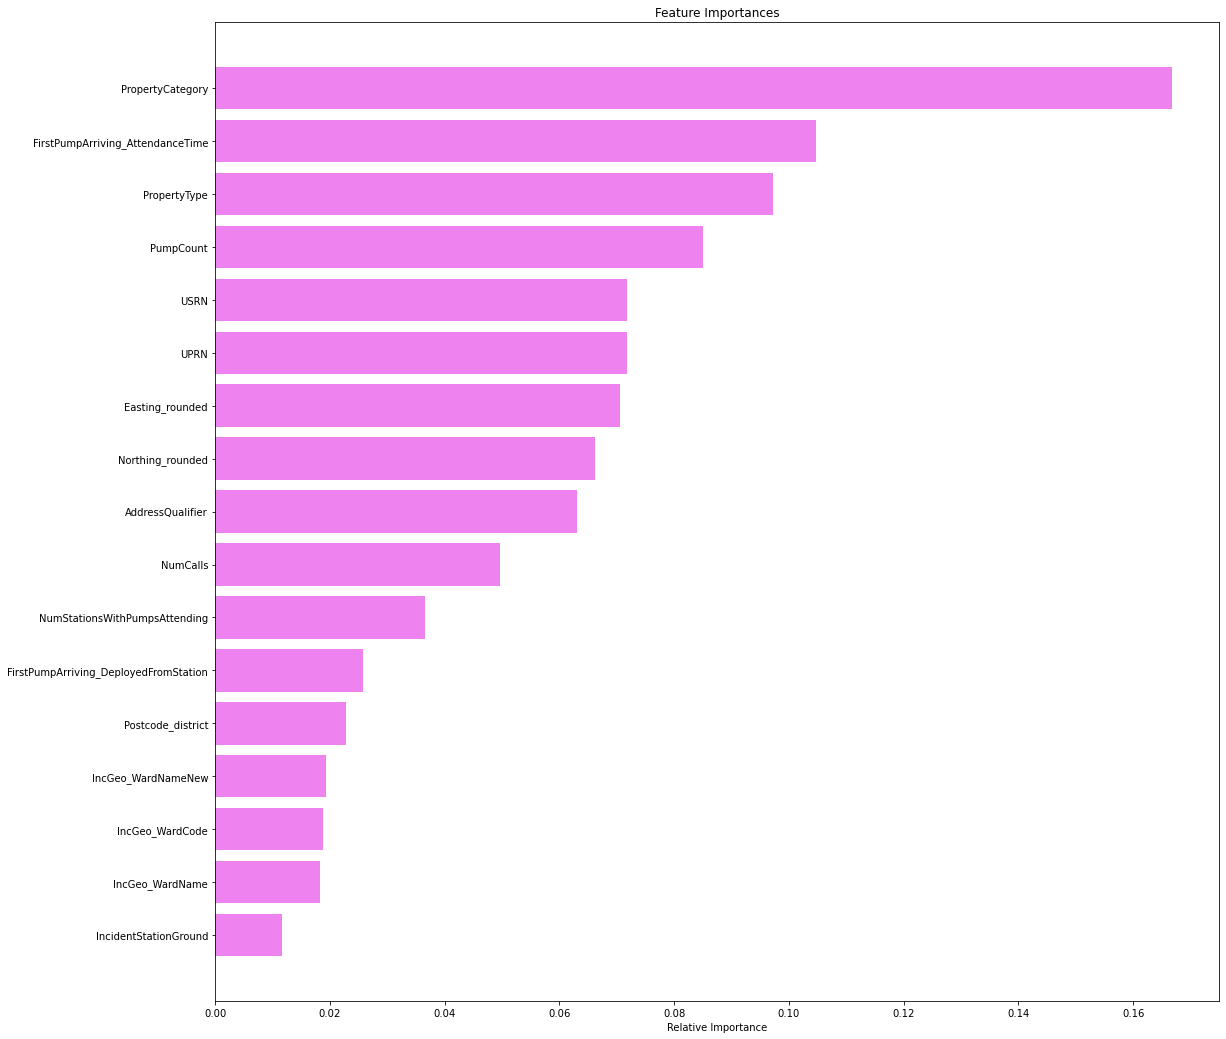

In [43]:
feature_names = X.columns
importances = (
    model2.feature_importances_
)  ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(18, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# MODEL TRAINING PERFORMANCE COMPARISON

In [44]:
# training performance comparison

models_train_comp_df = pd.concat(
    [knn_train_perf.T, rf_train_perf.T], axis=1,
)
models_train_comp_df.columns = [
    "KNN ",
    "Random Forest ",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,KNN,Random Forest
Accuracy,0.751693,1.0
Recall,0.737501,1.0
Precision,0.750984,1.0
F1,0.743092,1.0


In [45]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [knn_test_perf.T,rf_test_perf.T], axis=1,
)
models_test_comp_df.columns = [
    "KNN ",
    "Random Forest ",
]
print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


,KNN,Random Forest
Accuracy,0.684791,0.787289
Recall,0.668217,0.782995
Precision,0.682950,0.777548
F1,0.674332,0.780073


# Descriptive Machine Learning Models

We will try to cluster the features and try to find the patterns in the data for the buisness problem.

# K Means Clustering with Elbow Method

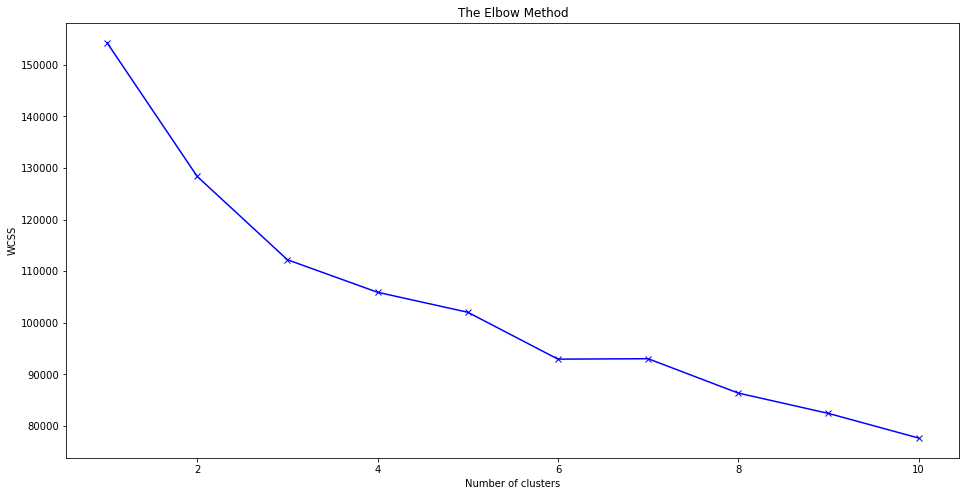

In [46]:
### Elbow methood
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(X_scaled)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Observation:

We observe the elbow at k =3

In [47]:
### applying the kmeans clustring with the best number of k

In [48]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [49]:
### assigning the clusters values 
df_copy['labels']= kmeans.labels_
df_copy

,UPRN,USRN,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,PumpCount,NumCalls,IncidentGroup,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_DeployedFromStation,labels
0,1.000202e+11,20100028.0,548950.0,178050.0,225.0,1.0,1.0,1.0,Fire,Outdoor,Loose refuse,On land associated with building,DA17,E05011218,BELVEDERE,BELVEDERE,Erith,Erith,2
1,1.000236e+11,20100344.0,549150.0,178850.0,450.0,1.0,1.0,1.0,Fire,Outdoor,Loose refuse,On land associated with building,DA17,E05011218,BELVEDERE,BELVEDERE,Erith,Erith,2
2,1.002330e+10,20100198.0,551950.0,176650.0,351.0,1.0,1.0,10.0,Fire,Road Vehicle,Car,In street outside gazetteer location,DA8,E05011231,SLADE GREEN & NORTHEND,SLADE GREEN & NORTHEND,Erith,Erith,1
3,0.000000e+00,20100351.0,551650.0,177550.0,278.0,2.0,2.0,2.0,False Alarm,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,DA8,E05011225,ERITH,ERITH,Erith,Erith,2
4,0.000000e+00,20100873.0,546050.0,172550.0,205.0,1.0,1.0,1.0,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,DA15,E05011227,LONGLANDS,LONGLANDS,Sidcup,Sidcup,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,1.000202e+11,20100870.0,550950.0,174750.0,302.0,2.0,2.0,2.0,False Alarm,Other Residential,Retirement/Old Persons Home,Correct incident location,DA1,E05011222,CRAYFORD,CRAYFORD,Bexley,Bexley,2
9069,1.000202e+11,20100870.0,550950.0,174750.0,162.0,1.0,1.0,1.0,False Alarm,Other Residential,Retirement/Old Persons Home,Correct incident location,DA1,E05011222,CRAYFORD,CRAYFORD,Bexley,Bexley,2
9070,1.000229e+11,20101499.0,546850.0,176850.0,439.0,1.0,1.0,1.0,False Alarm,Non Residential,Community centre/Hall,On land associated with building,DA16,E05011224,EAST WICKHAM,EAST WICKHAM,Plumstead,Plumstead,0
9071,1.000202e+11,20100633.0,551650.0,175050.0,306.0,2.0,2.0,1.0,Special Service,Road Vehicle,Car,In street outside gazetteer location,DA1,E05011222,CRAYFORD,CRAYFORD,Bexley,Bexley,2


<AxesSubplot:>

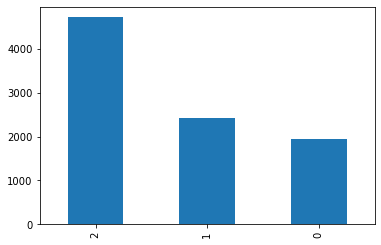

In [50]:
### plotting the labels
df_copy['labels'].value_counts().plot.bar()

labels              0     1     2   All
IncidentGroup                          
All              1934  2428  4711  9073
False Alarm       889   915  2230  4034
Special Service   671   828  1399  2898
Fire              374   685  1082  2141
------------------------------------------------------------------------------------------------------------------------


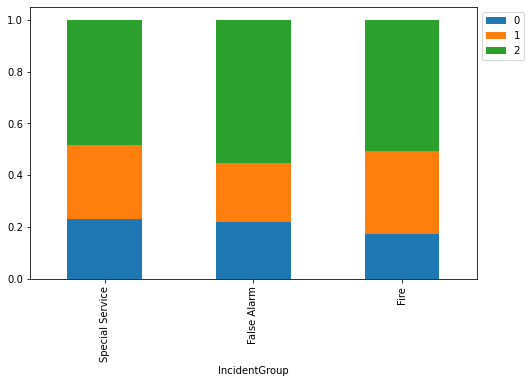

labels                0     1     2   All
PropertyCategory                         
All                1934  2428  4711  9073
Dwelling            820  1201  1830  3851
Non Residential     403   261   984  1648
Outdoor             233   463   727  1423
Road Vehicle        202   234   533   969
Other Residential   157   105   349   611
Outdoor Structure   118   163   286   567
Rail Vehicle          1     1     1     3
Boat                  0     0     1     1
------------------------------------------------------------------------------------------------------------------------


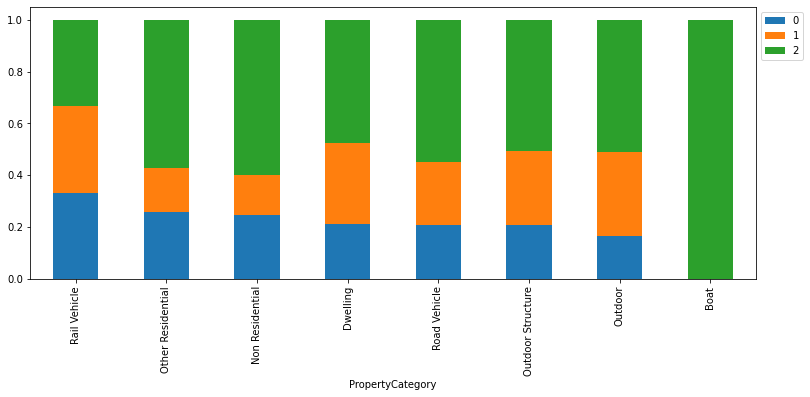

labels                                                 0     1     2   All
PropertyType                                                              
All                                                 1934  2428  4711  9073
House - single occupancy                             285   450   717  1452
Purpose Built Flats/Maisonettes - Up to 3 storeys    232   227   318   777
Self contained Sheltered Housing                     193    92   271   556
Car                                                  114   129   322   565
...                                                  ...   ...   ...   ...
Licensed House in Multiple Occupation - 3 or mo...     0     3     4     7
Licensed House in Multiple Occupation - Up to 2...     0    10    39    49
Public toilets                                         0     0     3     3
Motor Home                                             0     0     1     1
Other bulk storage                                     0     0     1     1

[204 rows x 4 columns]
-

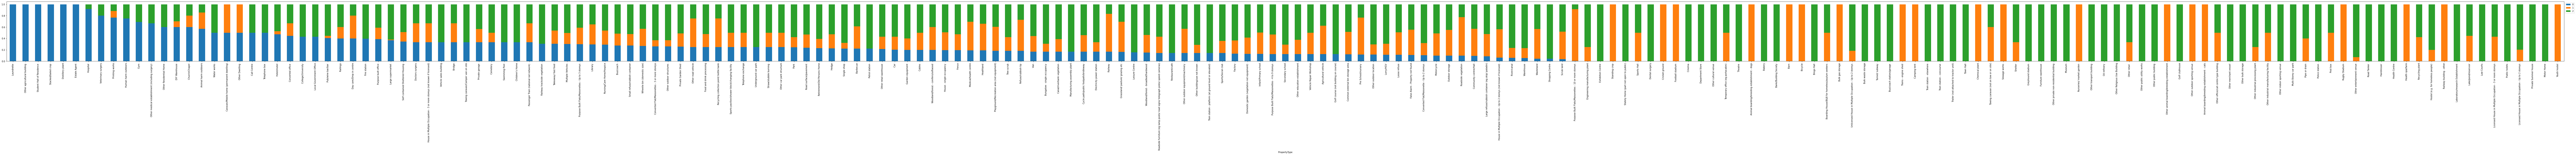

labels                                              0     1     2   All
AddressQualifier                                                       
All                                              1934  2428  4711  9073
Correct incident location                        1016  1204  2496  4716
Within same building                              363   368   650  1381
In street outside gazetteer location              192   209   417   818
On land associated with building                  179   277   535   991
Open land/water - nearest gazetteer location      108   203   308   619
In street close to gazetteer location              53   116   200   369
On motorway / elevated road                         8    10    29    47
Nearby address - street not listed in gazetteer     6    16    29    51
In street remote from gazetteer location            4    11    21    36
Nearby address - no building in street              3    11    18    32
Railway land or rolling stock                       2     3     

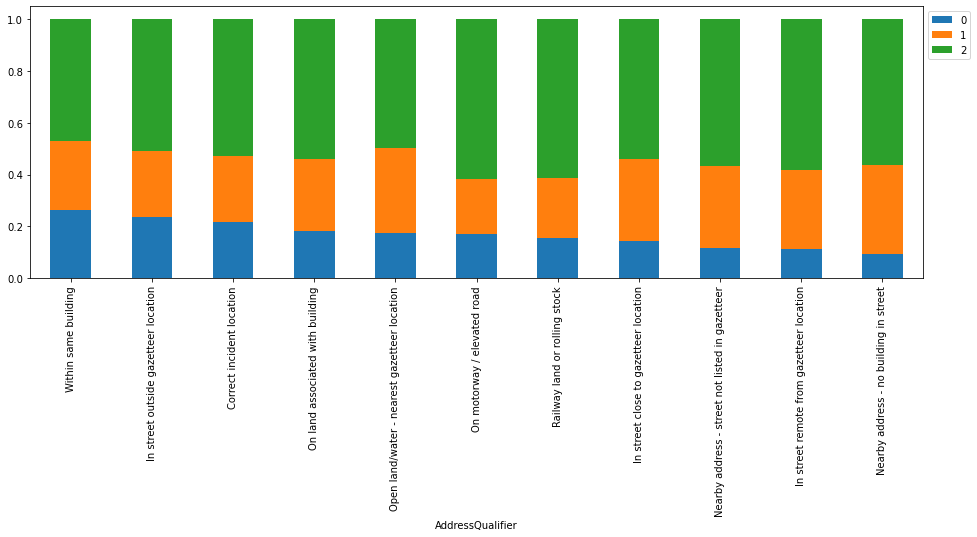

labels                0     1     2   All
Postcode_district                        
All                1934  2428  4711  9073
DA14               1212     2     1  1215
DA15                407     0   184   591
DA16                290    60   333   683
DA5                  13   274   201   488
SE9                  11     4     9    24
BR8                   1     0     0     1
DA1                   0     1   667   668
DA17                  0    28   921   949
DA18                  0   302     0   302
DA6                   0     1   684   685
DA7                   0   142   688   830
DA8                   0  1008   971  1979
SE2                   0   401    52   453
SE28                  0   205     0   205
------------------------------------------------------------------------------------------------------------------------


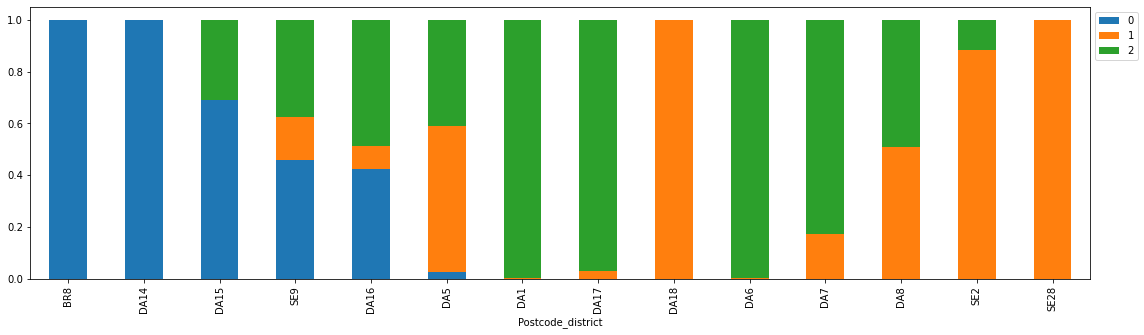

labels              0     1     2   All
IncGeo_WardCode                        
All              1934  2428  4711  9073
E05011230         862     0     0   862
E05011227         348     0     0   348
E05011224         206     0    90   296
E05011220         157     0   139   296
E05011229         156   276     0   432
E05011221         116     0   139   255
E05011226          89     7   279   375
E05011231           0   772     0   772
NA                  0     1     0     1
E05014088           0     1     0     1
E05011233           0   252     0   252
E05011232           0   852     0   852
E05011228           0   227     0   227
E05011219           0     0   764   764
E05011218           0     0   890   890
E05011225           0    40   946   986
E05011223           0     0   348   348
E05011222           0     0   784   784
E05011217           0     0   332   332
------------------------------------------------------------------------------------------------------------------------

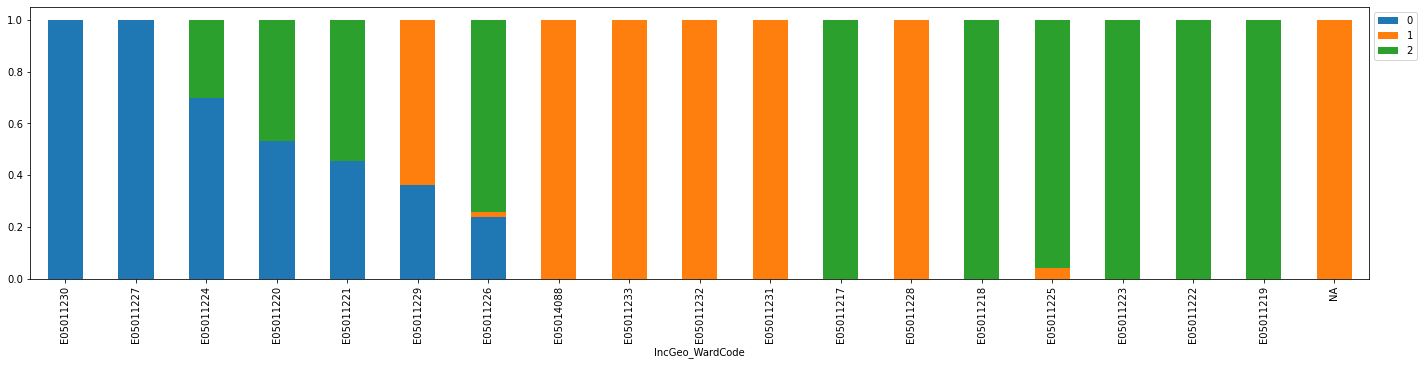

labels                     0     1     2   All
IncGeo_WardName                               
All                     1934  2428  4711  9073
SIDCUP                   857     0     0   857
LONGLANDS                345     0     0   345
EAST WICKHAM             205     0    90   295
BLACKFEN & LAMORBEY      157     0   139   296
ST. MARY'S & ST. JAMES   155   276     0   431
BLENDON & PENHILL        116     0   139   255
FALCONWOOD & WELLING      89     6   279   374
Sidcup                     5     0     0     5
Longlands                  3     0     0     3
St. Mary's & St. James     1     0     0     1
East Wickham               1     0     0     1
BEXLEYHEATH                0     0   764   764
West Heath                 0     9     0     9
WEST HEATH                 0   243     0   243
THAMESMEAD EAST            0   852     0   852
SLADE GREEN & NORTHEND     0   772     0   772
NA                         0     1     0     1
Plumstead Common           0     1     0     1
NORTHUMBERLAN

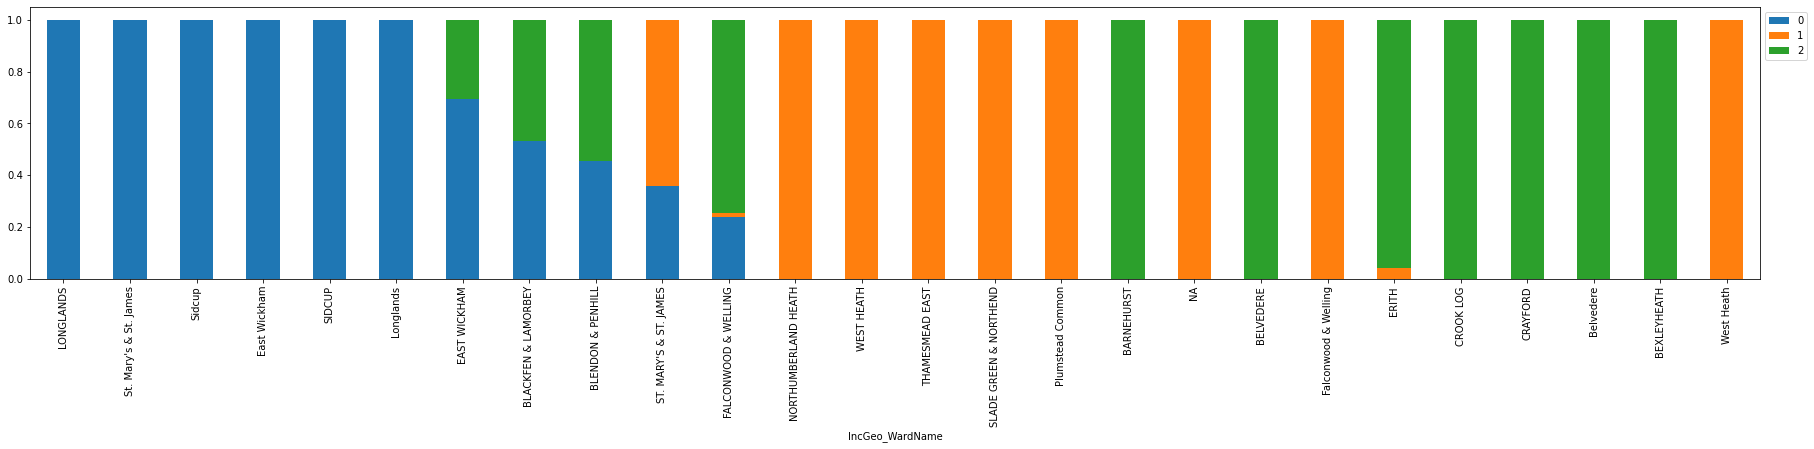

labels                     0     1     2   All
IncGeo_WardNameNew                            
All                     1934  2428  4711  9073
SIDCUP                   857     0     0   857
LONGLANDS                345     0     0   345
EAST WICKHAM             205     0    90   295
BLACKFEN & LAMORBEY      157     0   139   296
ST. MARY'S & ST. JAMES   155   276     0   431
BLENDON & PENHILL        116     0   139   255
FALCONWOOD & WELLING      89     6   279   374
Sidcup                     5     0     0     5
Longlands                  3     0     0     3
St. Mary's & St. James     1     0     0     1
East Wickham               1     0     0     1
BEXLEYHEATH                0     0   764   764
West Heath                 0     9     0     9
WEST HEATH                 0   243     0   243
THAMESMEAD EAST            0   852     0   852
SLADE GREEN & NORTHEND     0   772     0   772
NA                         0     1     0     1
Plumstead Common           0     1     0     1
NORTHUMBERLAN

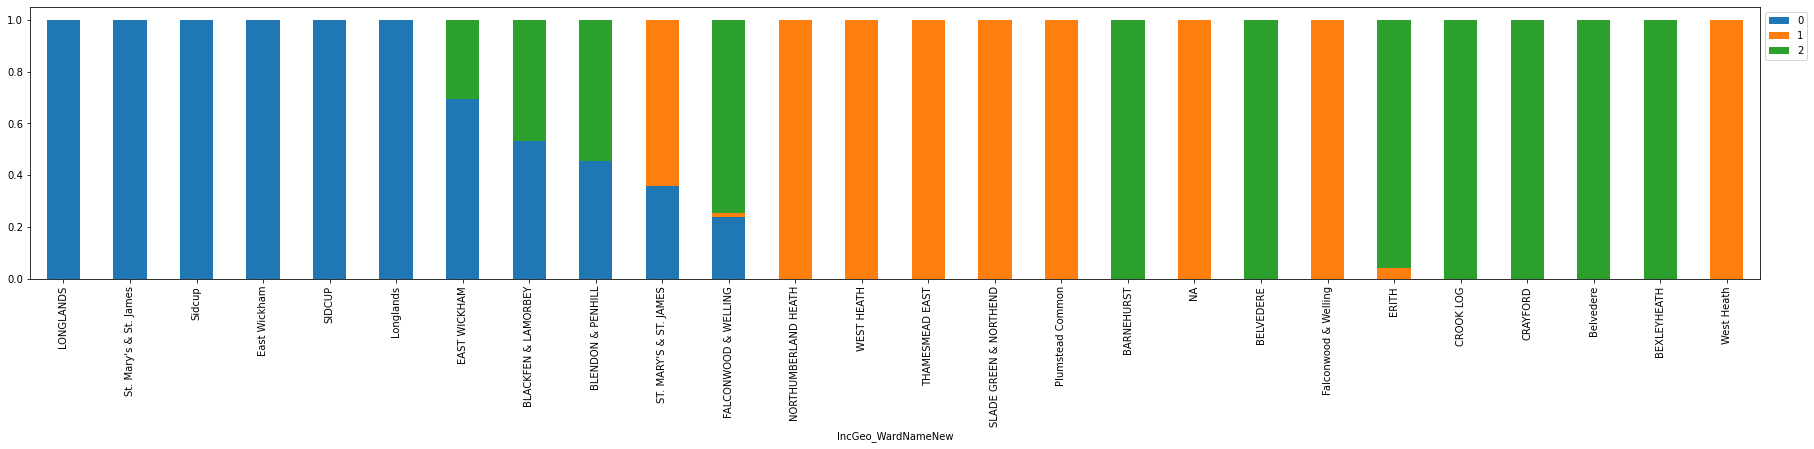

labels                    0     1     2   All
IncidentStationGround                        
All                    1934  2428  4711  9073
Sidcup                 1637     1    13  1651
Plumstead               248   295    64   607
Eltham                   49     6   237   292
Bexley                    0   539  2477  3016
Erith                     0  1587  1920  3507
------------------------------------------------------------------------------------------------------------------------


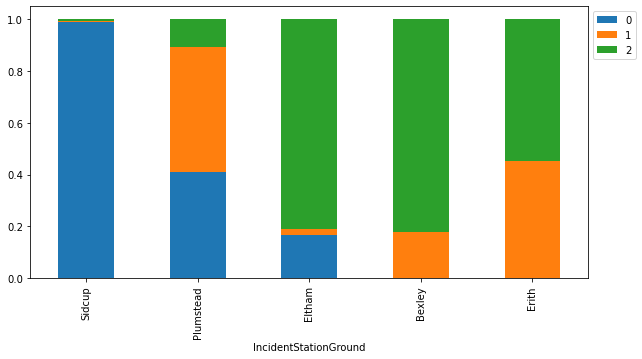

labels                                    0     1     2   All
FirstPumpArriving_DeployedFromStation                        
All                                    1934  2428  4711  9073
Sidcup                                 1427    56   144  1627
Plumstead                               258   764   242  1264
Eltham                                  109     6   233   348
NA                                       80   151   203   434
Bexley                                   31   540  2164  2735
Orpington                                23     1     0    24
Bromley                                   2     0     1     3
Lewisham                                  1     0     0     1
East Greenwich                            1    13    14    28
Erith                                     1   890  1698  2589
Lee Green                                 1     2     4     7
Sutton                                    0     1     0     1
Richmond                                  0     1     0     1
Addingto

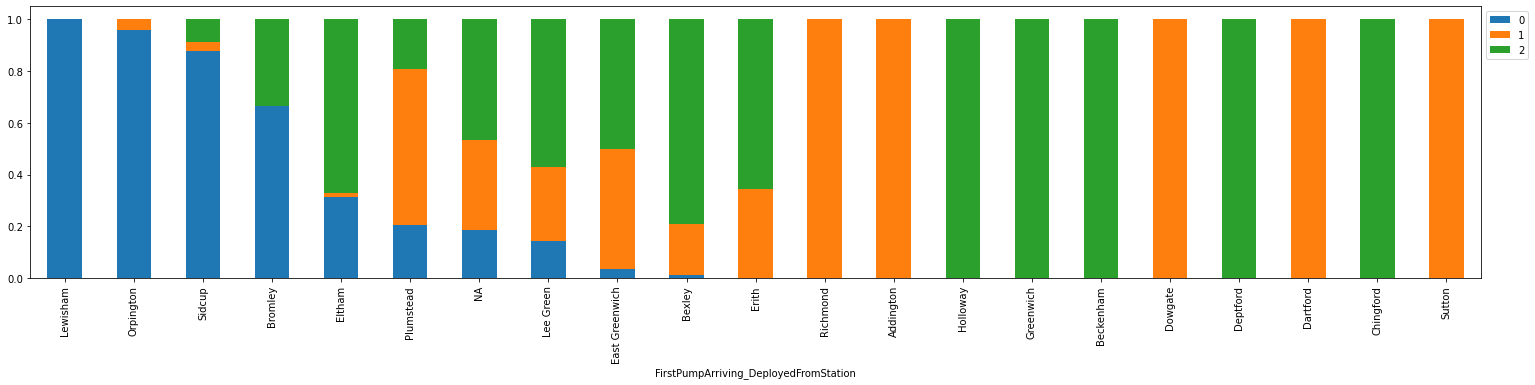

In [51]:
# Analyzing the categoric features
c_c = df_copy.select_dtypes('object').columns
for i in c_c :
    stacked_barplot(df_copy, i, "labels")

# DBSCAN

In [52]:
dbscan = DBSCAN(eps=2, min_samples=10).fit(X_scaled)
### assigning the clusters values 
df_copy['labels'] = dbscan.labels_

<AxesSubplot:>

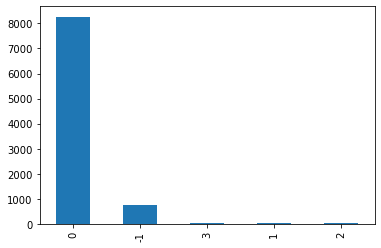

In [53]:
### plotting the labels
df_copy['labels'].value_counts().plot.bar()

labels            -1     0   1   2   3   All
IncidentGroup                               
All              754  8268  18  14  19  9073
False Alarm      247  3745  16   8  18  4034
Special Service  131  2759   1   6   1  2898
Fire             376  1764   1   0   0  2141
------------------------------------------------------------------------------------------------------------------------


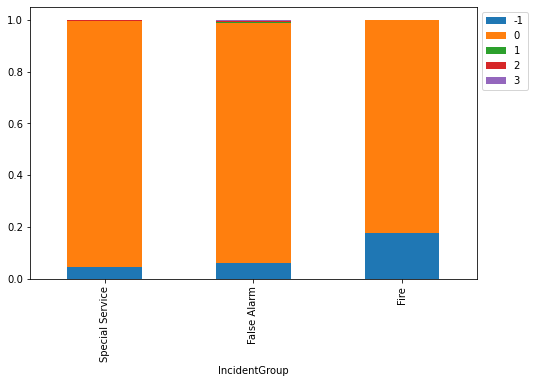

labels              -1     0   1   2   3   All
PropertyCategory                              
All                754  8268  18  14  19  9073
Other Residential   37   563   0  11   0   611
Non Residential    130  1497   0   2  19  1648
Outdoor            195  1227   0   1   0  1423
Boat                 0     1   0   0   0     1
Dwelling           141  3692  18   0   0  3851
Outdoor Structure   68   499   0   0   0   567
Rail Vehicle         2     1   0   0   0     3
Road Vehicle       181   788   0   0   0   969
------------------------------------------------------------------------------------------------------------------------


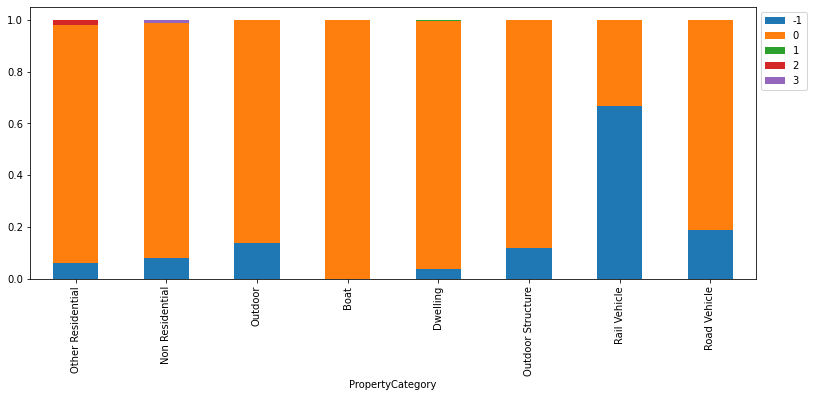

labels                                               -1     0   1   2   3  \
PropertyType                                                                
All                                                 754  8268  18  14  19   
Retirement/Old Persons Home                          27   391   0  10   0   
Road surface/pavement                                10   158   0   1   0   
Nursing/Care Home/Hospice                             7   105   0   1   0   
Other animal boarding/breeding establishment          2     6   0   1   0   
...                                                 ...   ...  ..  ..  ..   
House in Multiple Occupation - Up to 2 storeys ...    2    14   0   0   0   
Human harm outdoors                                   0     4   0   0   0   
Infant/Primary school                                 2   113   0   0   0   
Laboratory/research Establishment                     0     2   0   0   0   
Other bulk storage                                    0     1   0   0   0   

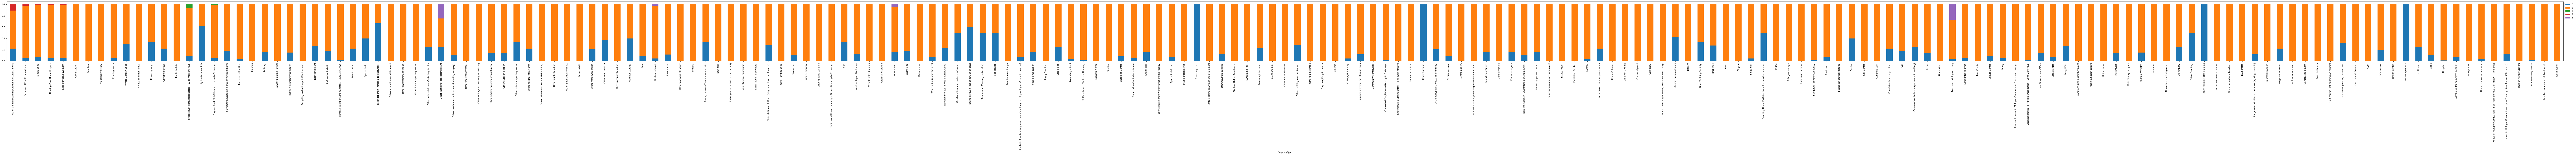

labels                                            -1     0   1   2   3   All
AddressQualifier                                                            
All                                              754  8268  18  14  19  9073
Correct incident location                        197  4487   0  13  19  4716
In street close to gazetteer location             51   317   0   1   0   369
In street outside gazetteer location              98   720   0   0   0   818
In street remote from gazetteer location           5    31   0   0   0    36
Nearby address - no building in street             7    25   0   0   0    32
Nearby address - street not listed in gazetteer    9    42   0   0   0    51
On land associated with building                 168   823   0   0   0   991
On motorway / elevated road                       16    31   0   0   0    47
Open land/water - nearest gazetteer location     110   509   0   0   0   619
Railway land or rolling stock                      5     8   0   0   0    13

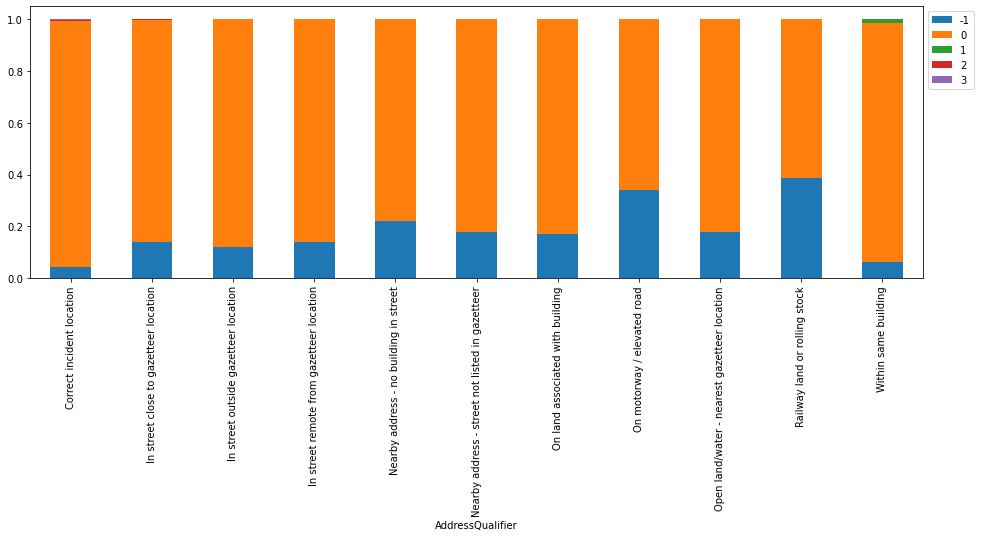

labels              -1     0   1   2   3   All
Postcode_district                             
DA5                 84   390   0  14   0   488
All                754  8268  18  14  19  9073
BR8                  1     0   0   0   0     1
DA1                 72   577   0   0  19   668
DA14                49  1166   0   0   0  1215
DA15                53   538   0   0   0   591
DA16                69   614   0   0   0   683
DA17                64   885   0   0   0   949
DA18                19   280   3   0   0   302
DA6                 32   653   0   0   0   685
DA7                 46   784   0   0   0   830
DA8                195  1784   0   0   0  1979
SE2                 35   403  15   0   0   453
SE28                11   194   0   0   0   205
SE9                 24     0   0   0   0    24
------------------------------------------------------------------------------------------------------------------------


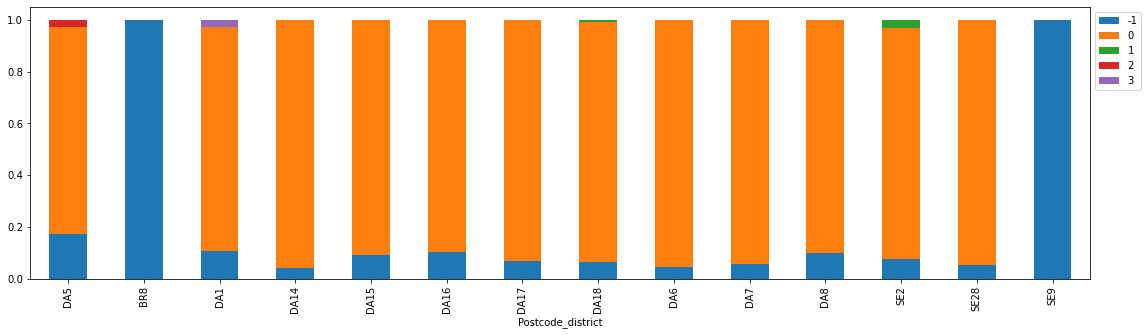

labels            -1     0   1   2   3   All
IncGeo_WardCode                             
All              754  8268  18  14  19  9073
E05011229         81   337   0  14   0   432
E05011218         68   822   0   0   0   890
NA                 1     0   0   0   0     1
E05014088          1     0   0   0   0     1
E05011233         25   227   0   0   0   252
E05011232         51   783  18   0   0   852
E05011231        103   669   0   0   0   772
E05011230         27   835   0   0   0   862
E05011228         19   208   0   0   0   227
E05011217         18   314   0   0   0   332
E05011226         53   322   0   0   0   375
E05011225         61   925   0   0   0   986
E05011224         29   267   0   0   0   296
E05011223         16   332   0   0   0   348
E05011222         81   684   0   0  19   784
E05011221         27   228   0   0   0   255
E05011220         26   270   0   0   0   296
E05011219         43   721   0   0   0   764
E05011227         24   324   0   0   0   348
----------

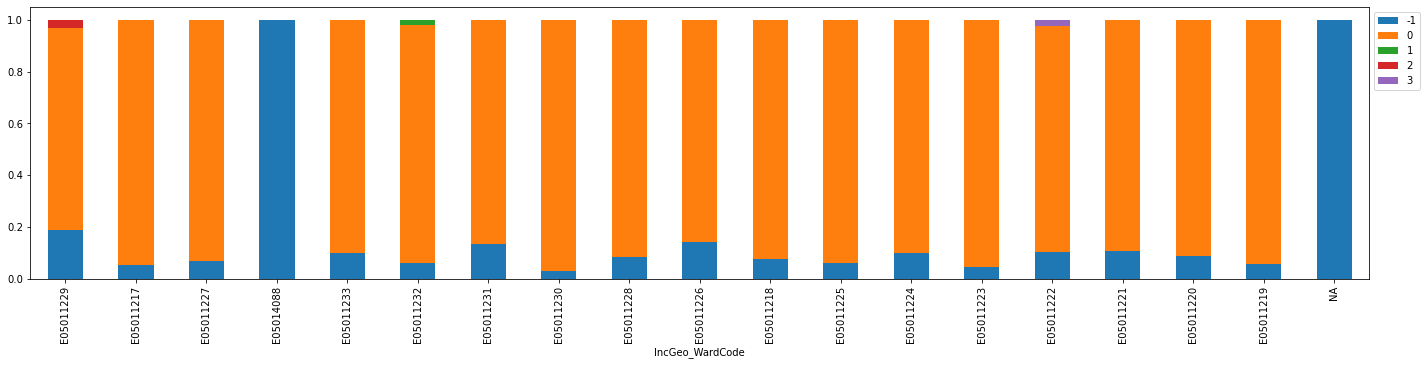

labels                   -1     0   1   2   3   All
IncGeo_WardName                                    
All                     754  8268  18  14  19  9073
ST. MARY'S & ST. JAMES   80   337   0  14   0   431
Longlands                 0     3   0   0   0     3
West Heath                3     6   0   0   0     9
WEST HEATH               22   221   0   0   0   243
THAMESMEAD EAST          51   783  18   0   0   852
St. Mary's & St. James    1     0   0   0   0     1
Sidcup                    0     5   0   0   0     5
SLADE GREEN & NORTHEND  103   669   0   0   0   772
SIDCUP                   27   830   0   0   0   857
Plumstead Common          1     0   0   0   0     1
NORTHUMBERLAND HEATH     19   208   0   0   0   227
NA                        1     0   0   0   0     1
BARNEHURST               18   314   0   0   0   332
BELVEDERE                67   822   0   0   0   889
Falconwood & Welling      1     0   0   0   0     1
FALCONWOOD & WELLING     52   322   0   0   0   374
East Wickham

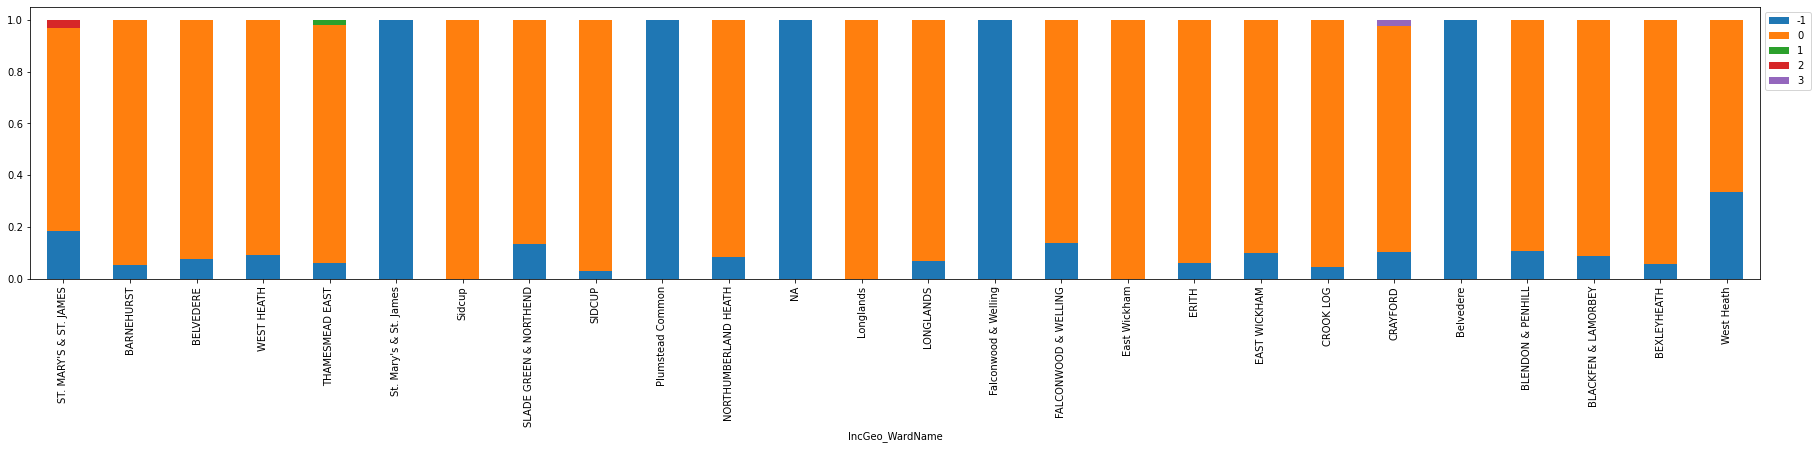

labels                   -1     0   1   2   3   All
IncGeo_WardNameNew                                 
All                     754  8268  18  14  19  9073
ST. MARY'S & ST. JAMES   80   337   0  14   0   431
Longlands                 0     3   0   0   0     3
West Heath                3     6   0   0   0     9
WEST HEATH               22   221   0   0   0   243
THAMESMEAD EAST          51   783  18   0   0   852
St. Mary's & St. James    1     0   0   0   0     1
Sidcup                    0     5   0   0   0     5
SLADE GREEN & NORTHEND  103   669   0   0   0   772
SIDCUP                   27   830   0   0   0   857
Plumstead Common          1     0   0   0   0     1
NORTHUMBERLAND HEATH     19   208   0   0   0   227
NA                        1     0   0   0   0     1
BARNEHURST               18   314   0   0   0   332
BELVEDERE                67   822   0   0   0   889
Falconwood & Welling      1     0   0   0   0     1
FALCONWOOD & WELLING     52   322   0   0   0   374
East Wickham

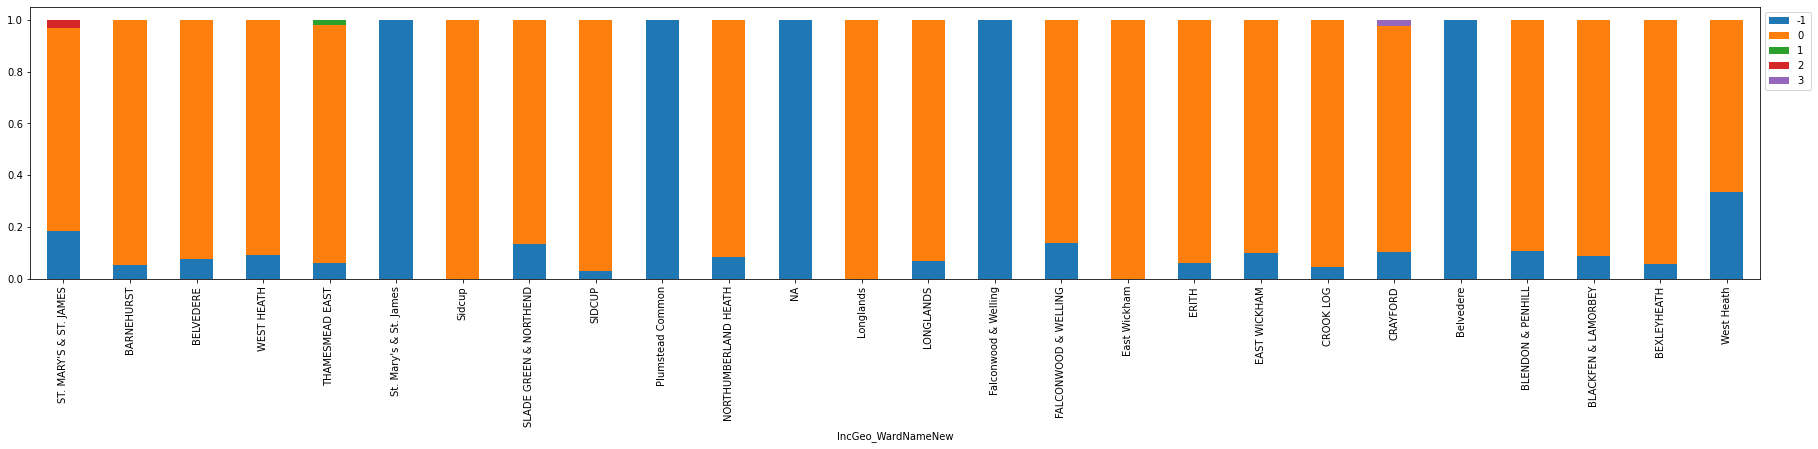

labels                  -1     0   1   2   3   All
IncidentStationGround                             
Bexley                 280  2703   0  14  19  3016
All                    754  8268  18  14  19  9073
Eltham                  49   243   0   0   0   292
Erith                  279  3210  18   0   0  3507
Plumstead               57   550   0   0   0   607
Sidcup                  89  1562   0   0   0  1651
------------------------------------------------------------------------------------------------------------------------


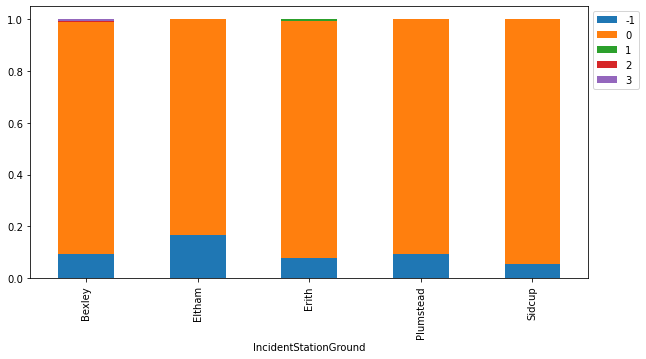

labels                                  -1     0   1   2   3   All
FirstPumpArriving_DeployedFromStation                             
All                                    754  8268  18  14  19  9073
Bexley                                 239  2465   0  14  17  2735
Holloway                                 0     1   0   0   0     1
Sutton                                   1     0   0   0   0     1
Sidcup                                 105  1522   0   0   0  1627
Richmond                                 0     1   0   0   0     1
Plumstead                              105  1146  13   0   0  1264
Orpington                                6    18   0   0   0    24
NA                                      28   406   0   0   0   434
Lewisham                                 1     0   0   0   0     1
Lee Green                                4     3   0   0   0     7
Addington                                1     0   0   0   0     1
Beckenham                                1     0   0   0   0  

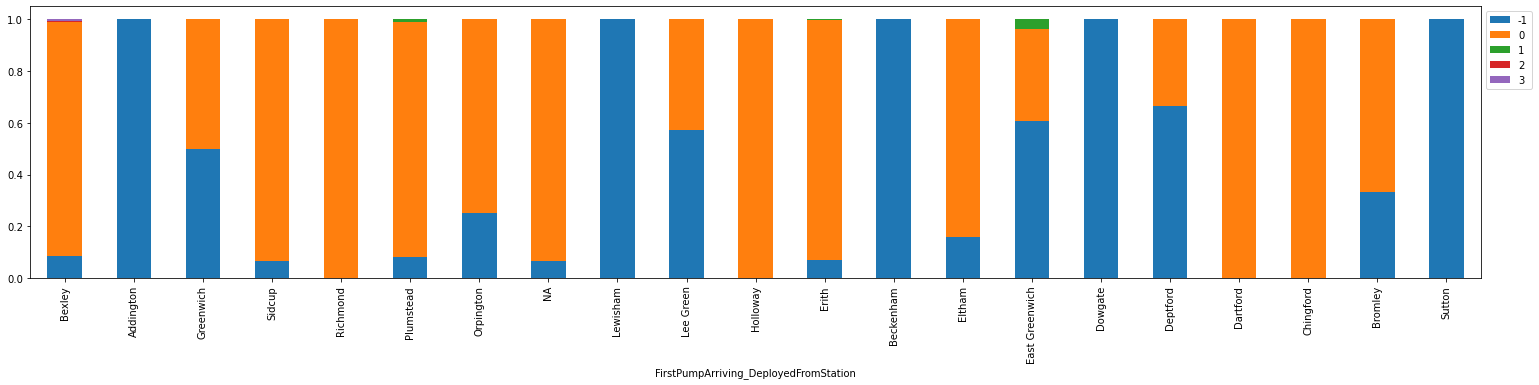

In [54]:
# Analyzing the categoric features
c_c = df_copy.select_dtypes('object').columns
for i in c_c :
    stacked_barplot(df_copy, i, "labels")